In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/steel-industry-energy-consumption/Steel_industry_data.csv
/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


# Importando os dados:

In [2]:
chuva = pd.read_csv('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv')
chuva

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

In [3]:
chuva.shape

(145460, 23)

In [4]:
chuva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Na página [Australian Government Bureau of Meteorology](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml), encontrei esta tabela que explica o significado da maioria das colunas:

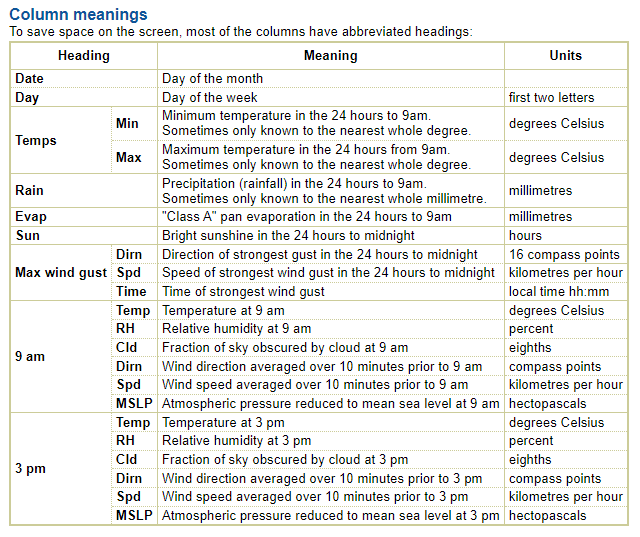

In [5]:
chuva['Date'] = pd.to_datetime(chuva['Date'])
chuva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [6]:
chuva.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [7]:
chuva_sydney = chuva.groupby('Location').get_group('Sydney')
chuva_sydney

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
30176 2008-02-01   Sydney     19.5     22.4      15.6          6.2       0.0   
30177 2008-02-02   Sydney     19.5     25.6       6.0          3.4       2.7   
30178 2008-02-03   Sydney     21.6     24.5       6.6          2.4       0.1   
30179 2008-02-04   Sydney     20.2     22.8      18.8          2.2       0.0   
30180 2008-02-05   Sydney     19.7     25.7      77.4          NaN       0.0   
...          ...      ...      ...      ...       ...          ...       ...   
33515 2017-06-21   Sydney      8.6     19.6       0.0          2.0       7.8   
33516 2017-06-22   Sydney      9.3     19.2       0.0          2.0       9.2   
33517 2017-06-23   Sydney      9.4     17.7       0.0          2.4       2.7   
33518 2017-06-24   Sydney     10.1     19.3       0.0          1.4       9.3   
33519 2017-06-25   Sydney      7.6     19.3       0.0          3.4       9.4   

      WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
30176         NaN            NaN          S  ...        92.0         84.0   
30177         NaN            NaN          W  ...        83.0         73.0   
30178         NaN            NaN        ESE  ...        88.0         86.0   
30179         NaN            NaN        NNE  ...        83.0         90.0   
30180         NaN            NaN        NNE  ...        88.0         74.0   
...           ...            ...        ...  ...         ...          ...   
33515         SSE           37.0          W  ...        73.0         52.0   
33516           W           30.0          W  ...        78.0         53.0   
33517           W           24.0        WNW  ...        85.0         56.0   
33518           W           43.0          W  ...        56.0         35.0   
33519           W           35.0          W  ...        73.0         32.0   

       Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
30176       1017.6       1017.4       8.0       8.0     20.7     20.9   
30177       1017.9       1016.4       7.0       7.0     22.4     24.8   
30178       1016.7       1015.6       7.0       8.0     23.5     23.0   
30179       1014.2       1011.8       8.0       8.0     21.4     20.9   
30180       1008.3       1004.8       8.0       8.0     22.5     25.5   
...            ...          ...       ...       ...      ...      ...   
33515       1025.9       1025.3       2.0       2.0     10.5     17.9   
33516       1028.5       1024.6       2.0       2.0     11.0     18.7   
33517       1020.8       1015.0       6.0       6.0     10.2     17.3   
33518       1017.3       1015.1       5.0       2.0     12.4     19.0   
33519       1018.6       1015.4       1.0       1.0      9.4     18.8   

       RainToday  RainTomorrow  
30176        Yes           Yes  
30177        Yes           Yes  
30178        Yes           Yes  
30179        Yes           Yes  
30180        Yes           Yes  
...          ...           ...  
33515         No            No  
33516         No            No  
33517         No            No  
33518         No            No  
33519         No            No  

[3344 rows x 23 columns]

# Primeiras visualizações:

In [8]:
import matplotlib.pyplot as plt

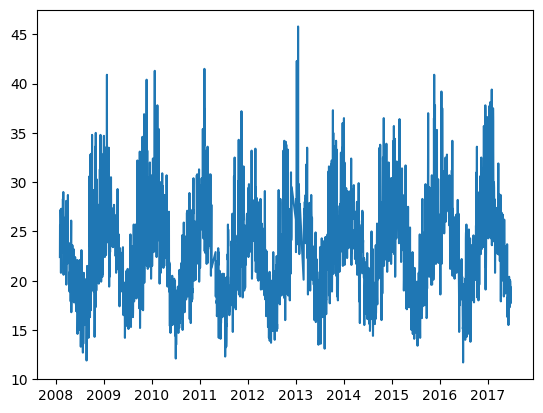

In [9]:
plt.plot(chuva_sydney['Date'], chuva_sydney['MaxTemp']);

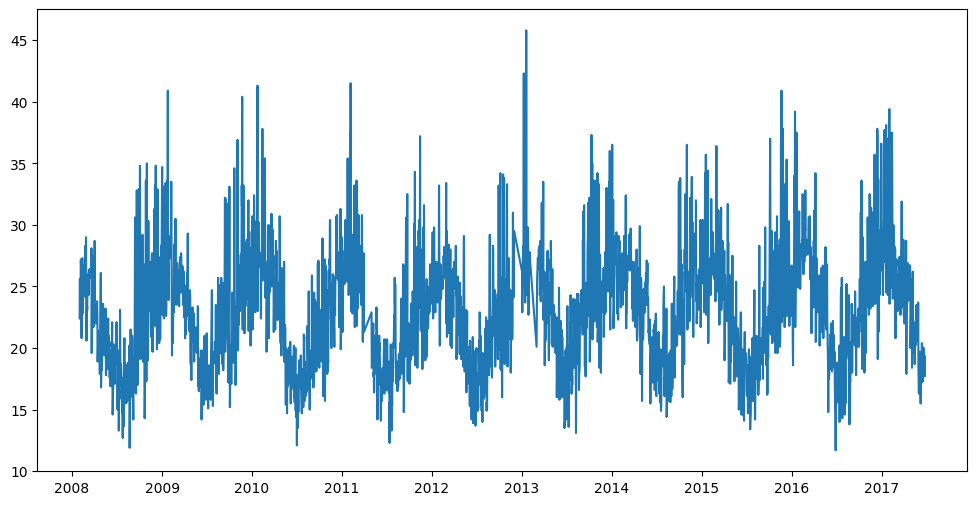

In [10]:
plt.figure(figsize = (12,6))
plt.plot(chuva_sydney['Date'], chuva_sydney['MaxTemp']);

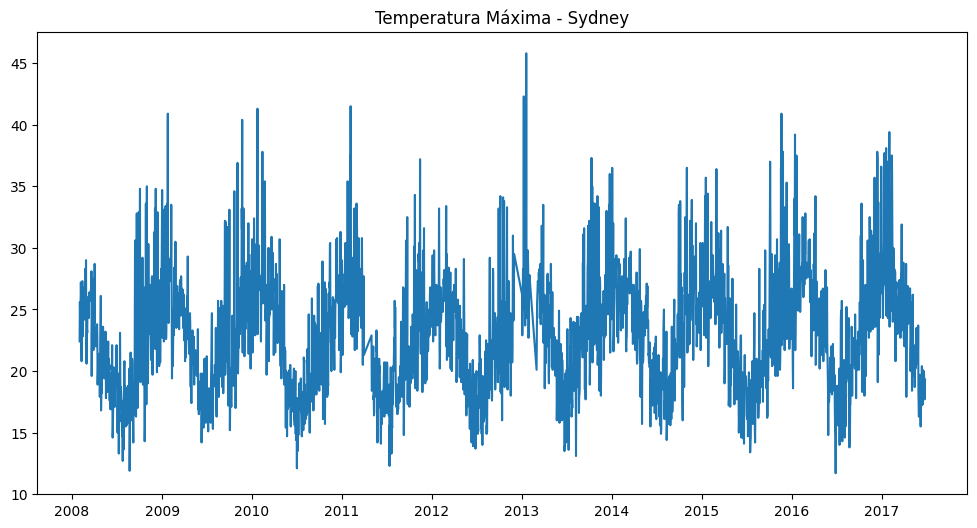

In [11]:
plt.figure(figsize = (12,6))
plt.plot(chuva_sydney['Date'], chuva_sydney['MaxTemp'])
plt.title('Temperatura Máxima - Sydney');

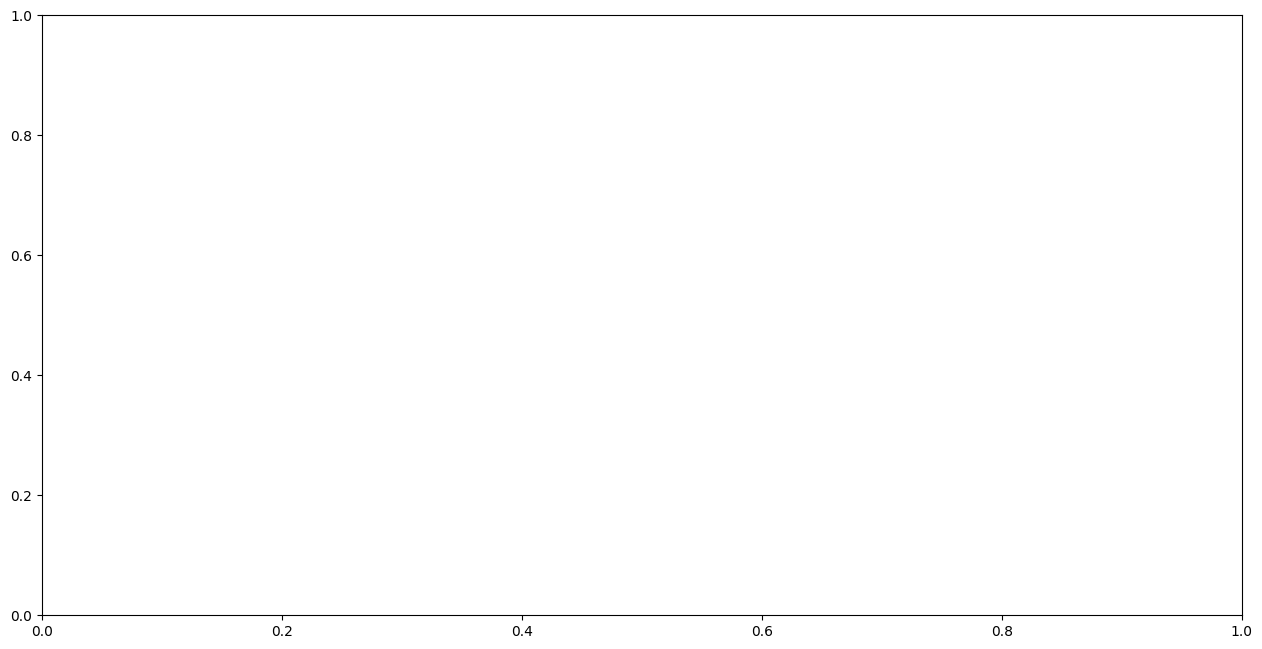

In [12]:
fig = plt.figure(figsize = (12,6))
eixo = fig.add_axes([0, 0, 1, 1])

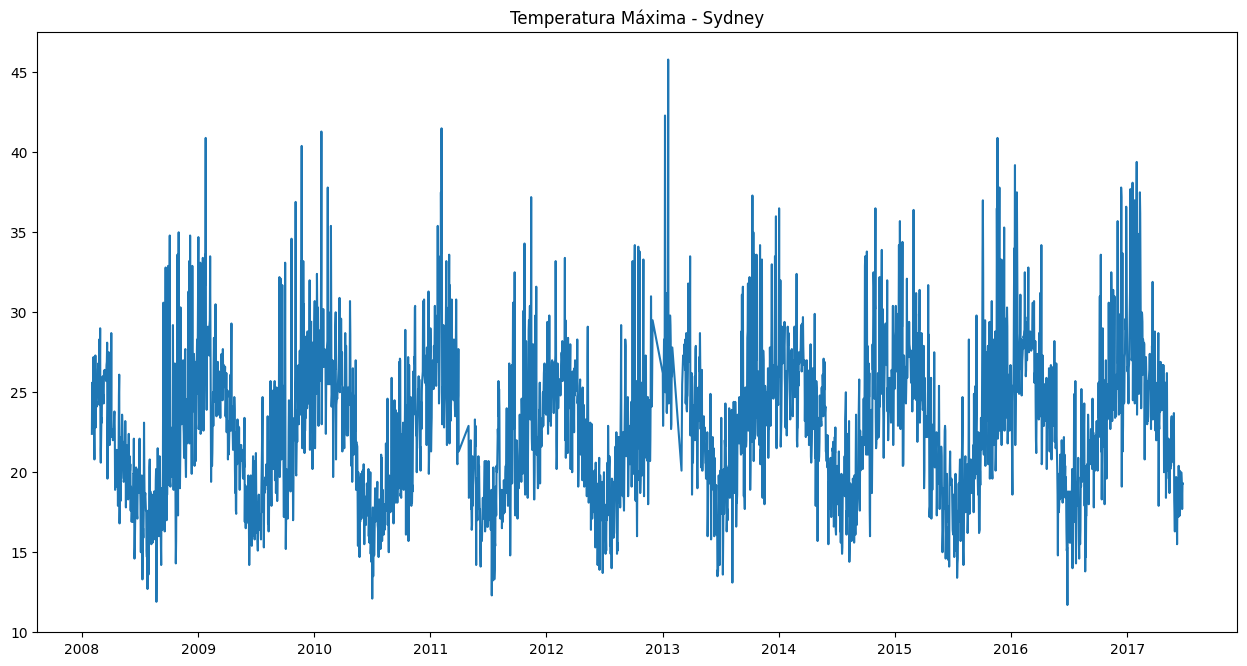

In [13]:
fig = plt.figure(figsize = (12,6))
eixo = fig.add_axes([0, 0, 1, 1])

eixo.plot(chuva_sydney['Date'], chuva_sydney['MaxTemp'])
eixo.set_title('Temperatura Máxima - Sydney');

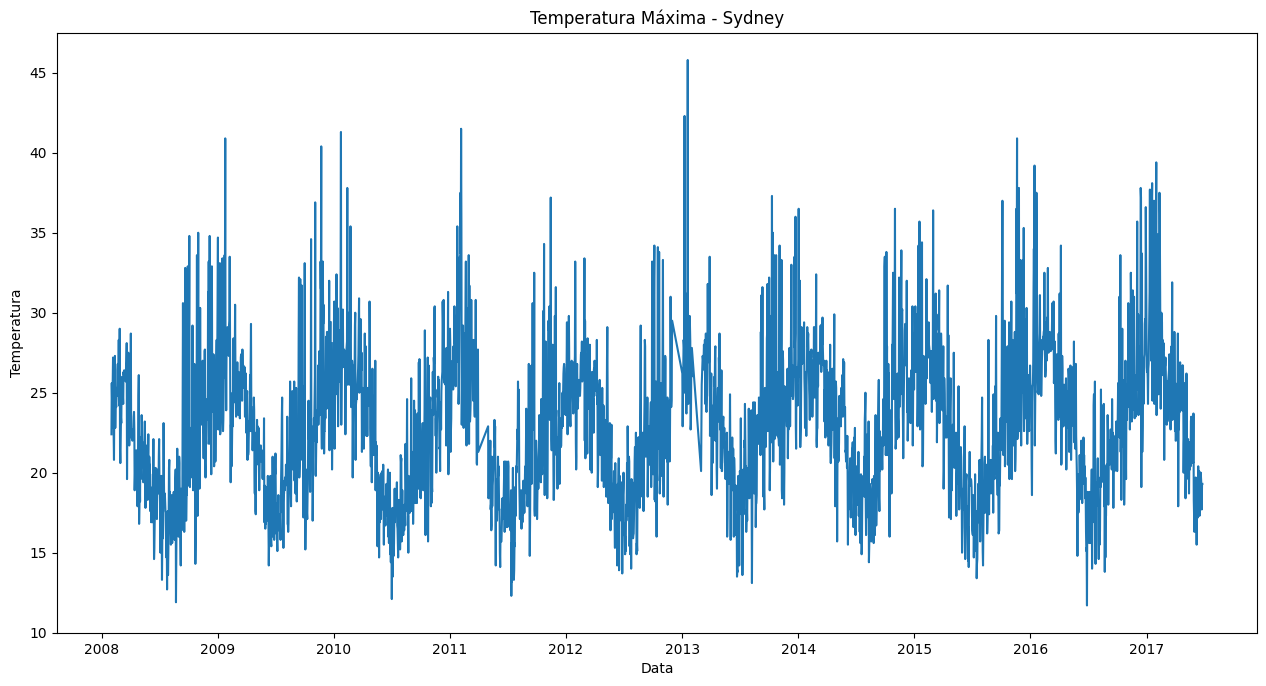

In [14]:
fig = plt.figure(figsize = (12,6))
eixo = fig.add_axes([0, 0, 1, 1])

eixo.plot(chuva_sydney['Date'], chuva_sydney['MaxTemp'])
eixo.set_title('Temperatura Máxima - Sydney')
eixo.set_ylabel('Temperatura')
eixo.set_xlabel('Data');

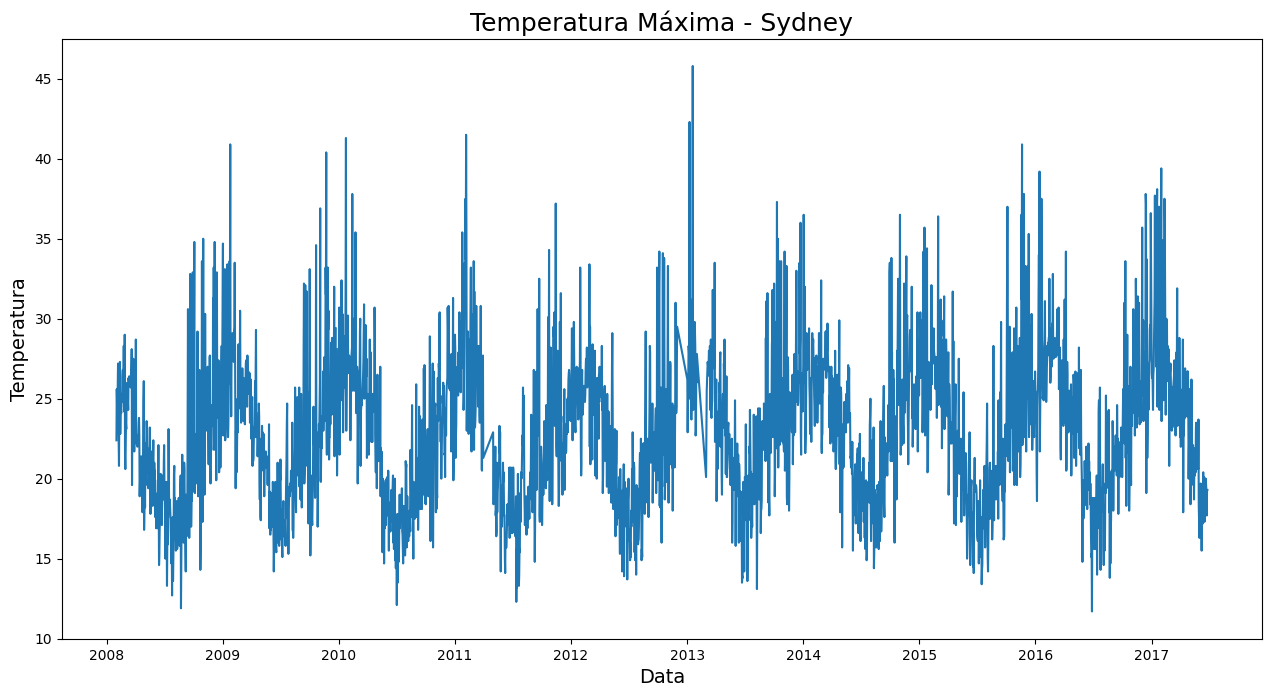

In [15]:
fig = plt.figure(figsize = (12,6))
eixo = fig.add_axes([0, 0, 1, 1])

eixo.plot(chuva_sydney['Date'], chuva_sydney['MaxTemp'])
eixo.set_title('Temperatura Máxima - Sydney', fontsize = 18)
eixo.set_ylabel('Temperatura', fontsize = 14)
eixo.set_xlabel('Data', fontsize = 14);

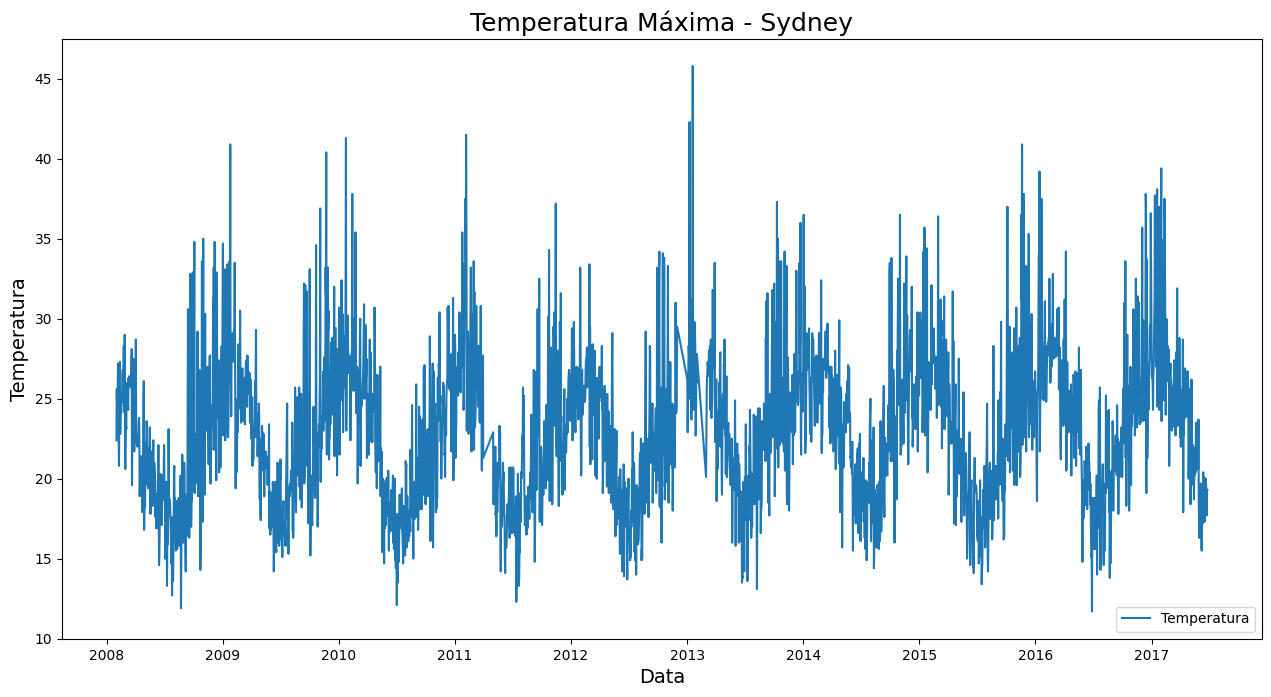

In [16]:
fig = plt.figure(figsize = (12,6))
eixo = fig.add_axes([0, 0, 1, 1])

eixo.plot(chuva_sydney['Date'], chuva_sydney['MaxTemp'])
eixo.set_title('Temperatura Máxima - Sydney', fontsize = 18)
eixo.set_ylabel('Temperatura', fontsize = 14)
eixo.set_xlabel('Data', fontsize = 14)
eixo.legend(['Temperatura'], loc = 'lower right', fontsize = 10);

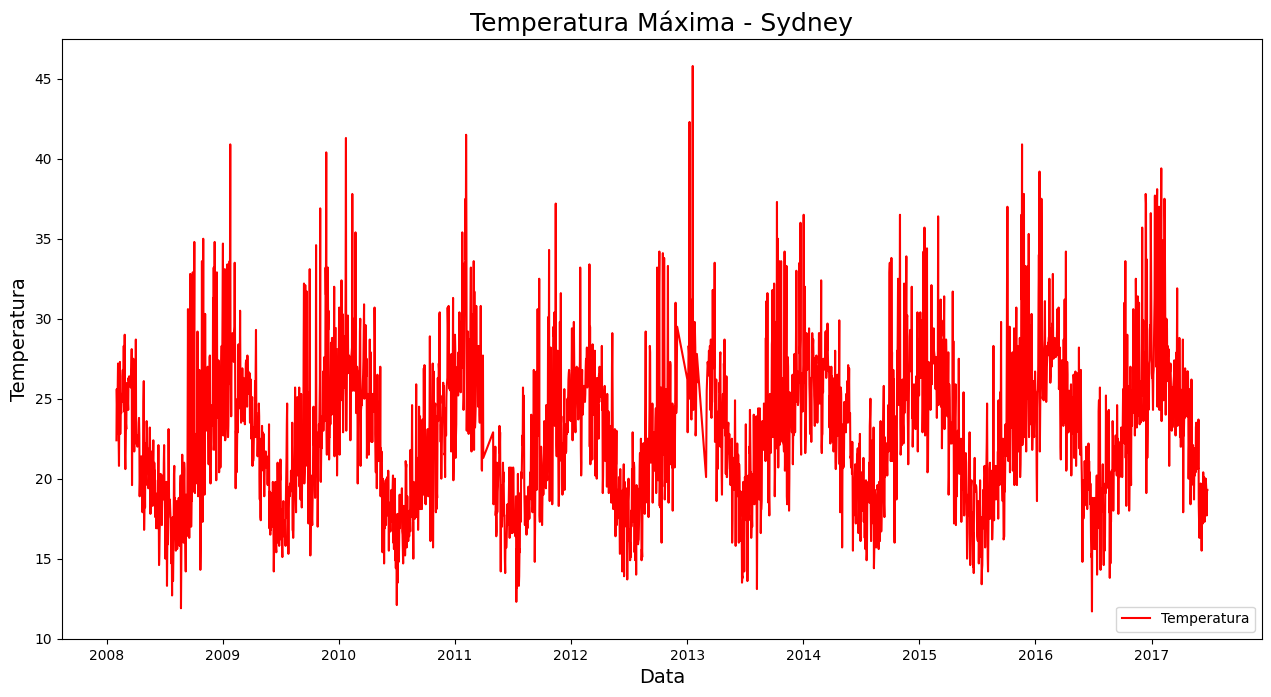

In [17]:
fig = plt.figure(figsize = (12,6))
eixo = fig.add_axes([0, 0, 1, 1])

eixo.plot(chuva_sydney['Date'], chuva_sydney['MaxTemp'], color = 'red')
eixo.set_title('Temperatura Máxima - Sydney', fontsize = 18)
eixo.set_ylabel('Temperatura', fontsize = 14)
eixo.set_xlabel('Data', fontsize = 14)
eixo.legend(['Temperatura'], loc = 'lower right', fontsize = 10);

# Customizando as visualizações:

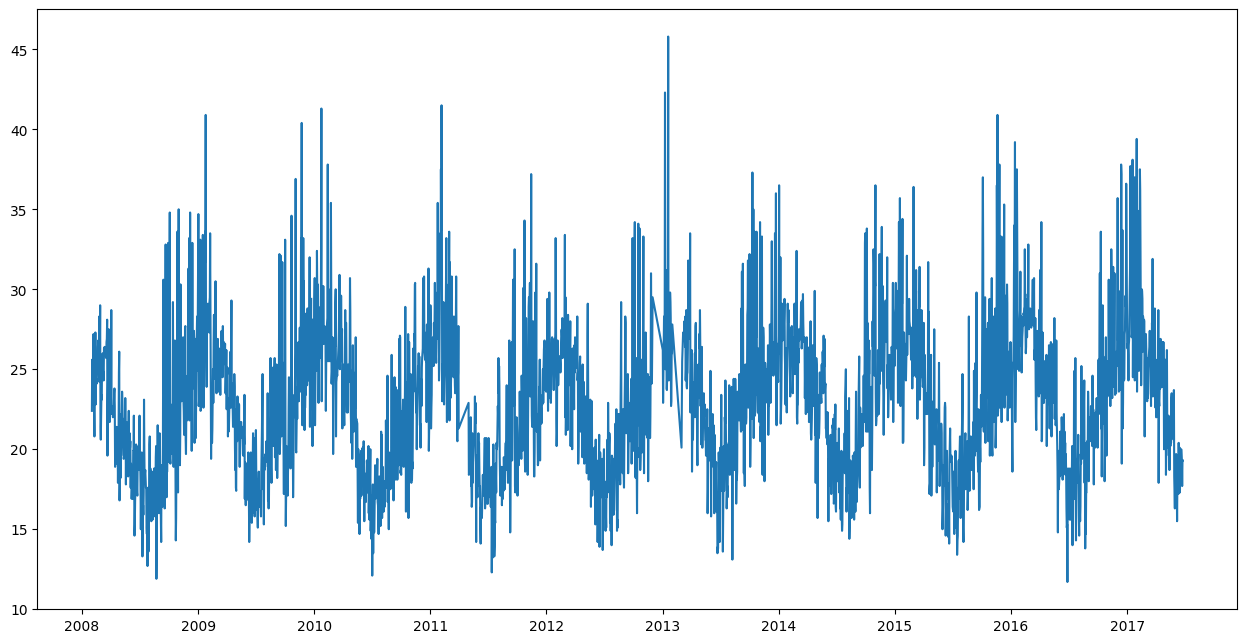

In [18]:
chuva_sydney = chuva.groupby('Location').get_group('Sydney')
fig = plt.figure(figsize = (12,6))
eixo = fig.add_axes([0, 0, 1, 1])
eixo.plot(chuva_sydney['Date'], chuva_sydney['MaxTemp']);

In [19]:
chuva_sydney.sort_values('Date')


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
30176 2008-02-01   Sydney     19.5     22.4      15.6          6.2       0.0   
30177 2008-02-02   Sydney     19.5     25.6       6.0          3.4       2.7   
30178 2008-02-03   Sydney     21.6     24.5       6.6          2.4       0.1   
30179 2008-02-04   Sydney     20.2     22.8      18.8          2.2       0.0   
30180 2008-02-05   Sydney     19.7     25.7      77.4          NaN       0.0   
...          ...      ...      ...      ...       ...          ...       ...   
33515 2017-06-21   Sydney      8.6     19.6       0.0          2.0       7.8   
33516 2017-06-22   Sydney      9.3     19.2       0.0          2.0       9.2   
33517 2017-06-23   Sydney      9.4     17.7       0.0          2.4       2.7   
33518 2017-06-24   Sydney     10.1     19.3       0.0          1.4       9.3   
33519 2017-06-25   Sydney      7.6     19.3       0.0          3.4       9.4   

      WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
30176         NaN            NaN          S  ...        92.0         84.0   
30177         NaN            NaN          W  ...        83.0         73.0   
30178         NaN            NaN        ESE  ...        88.0         86.0   
30179         NaN            NaN        NNE  ...        83.0         90.0   
30180         NaN            NaN        NNE  ...        88.0         74.0   
...           ...            ...        ...  ...         ...          ...   
33515         SSE           37.0          W  ...        73.0         52.0   
33516           W           30.0          W  ...        78.0         53.0   
33517           W           24.0        WNW  ...        85.0         56.0   
33518           W           43.0          W  ...        56.0         35.0   
33519           W           35.0          W  ...        73.0         32.0   

       Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
30176       1017.6       1017.4       8.0       8.0     20.7     20.9   
30177       1017.9       1016.4       7.0       7.0     22.4     24.8   
30178       1016.7       1015.6       7.0       8.0     23.5     23.0   
30179       1014.2       1011.8       8.0       8.0     21.4     20.9   
30180       1008.3       1004.8       8.0       8.0     22.5     25.5   
...            ...          ...       ...       ...      ...      ...   
33515       1025.9       1025.3       2.0       2.0     10.5     17.9   
33516       1028.5       1024.6       2.0       2.0     11.0     18.7   
33517       1020.8       1015.0       6.0       6.0     10.2     17.3   
33518       1017.3       1015.1       5.0       2.0     12.4     19.0   
33519       1018.6       1015.4       1.0       1.0      9.4     18.8   

       RainToday  RainTomorrow  
30176        Yes           Yes  
30177        Yes           Yes  
30178        Yes           Yes  
30179        Yes           Yes  
30180        Yes           Yes  
...          ...           ...  
33515         No            No  
33516         No            No  
33517         No            No  
33518         No            No  
33519         No            No  

[3344 rows x 23 columns]

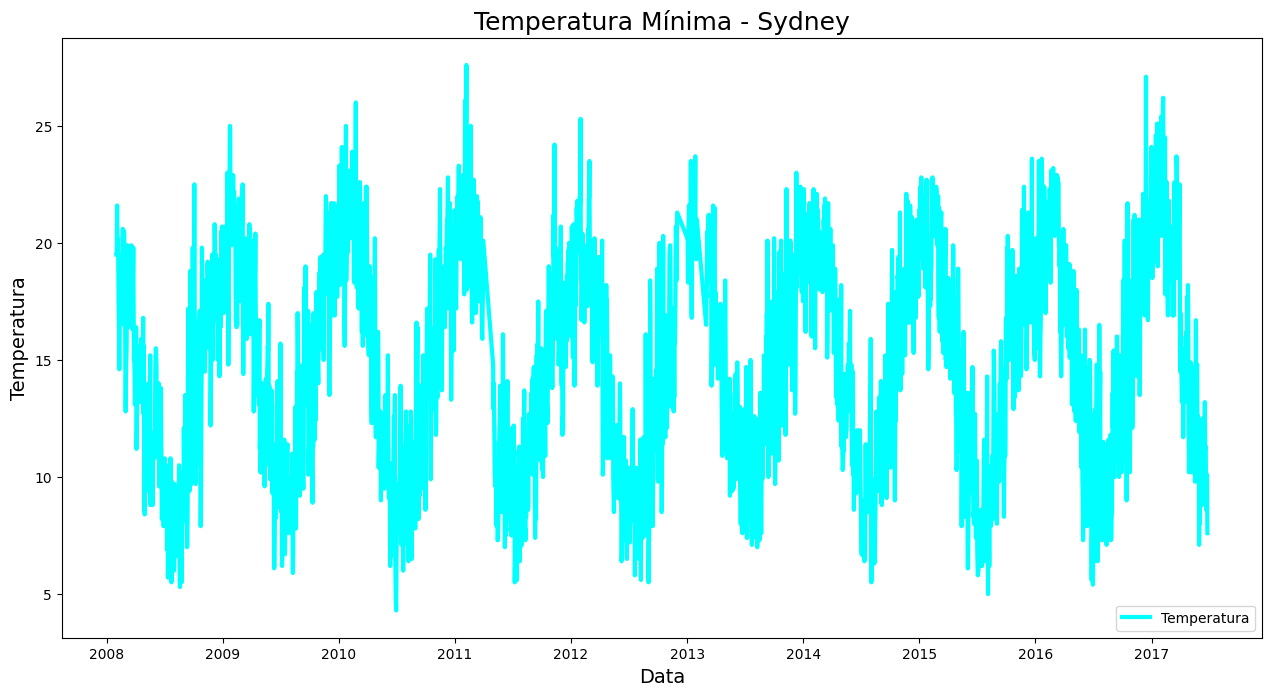

In [20]:
fig = plt.figure(figsize = (12,6))
eixo = fig.add_axes([0, 0, 1, 1])

eixo.plot(chuva_sydney['Date'], chuva_sydney['MinTemp'], color = 'aqua', lw = 3)
eixo.set_title('Temperatura Mínima - Sydney', fontsize = 18)
eixo.set_ylabel('Temperatura', fontsize = 14)
eixo.set_xlabel('Data', fontsize = 14)
eixo.legend(['Temperatura'], loc = 'lower right', fontsize = 10);

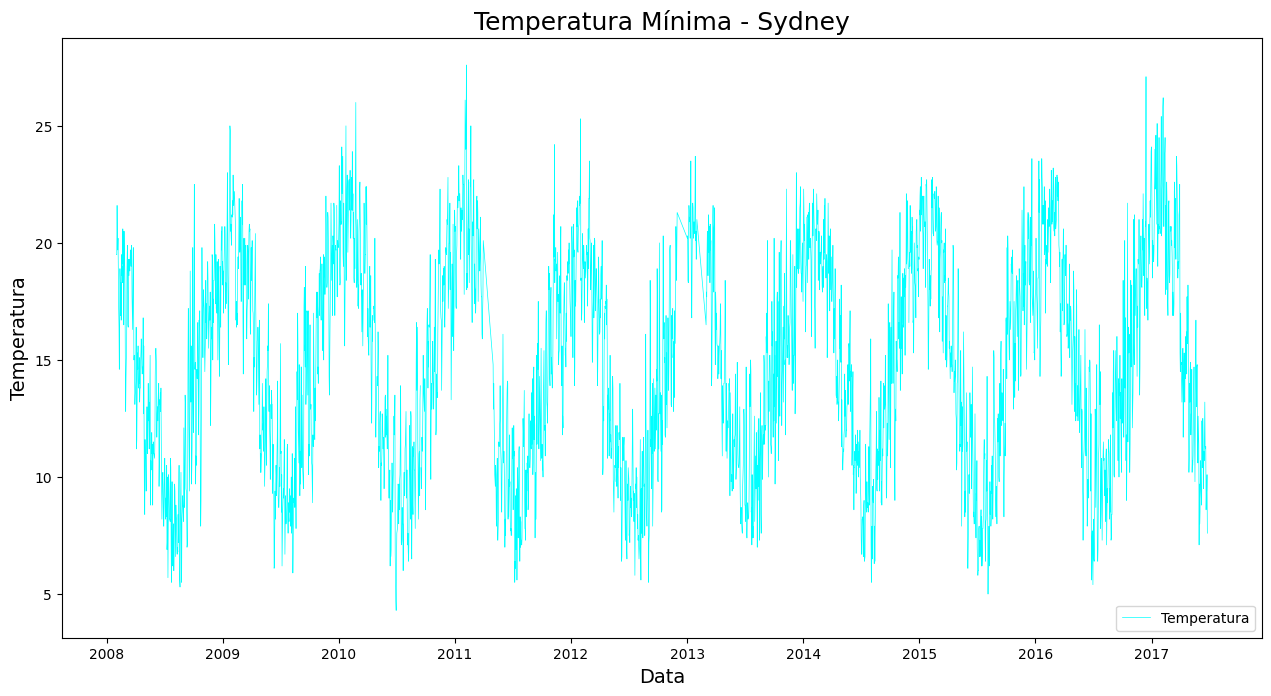

In [21]:
fig = plt.figure(figsize = (12,6))
eixo = fig.add_axes([0, 0, 1, 1])

eixo.plot(chuva_sydney['Date'], chuva_sydney['MinTemp'], color = 'aqua', lw = 0.5)
eixo.set_title('Temperatura Mínima - Sydney', fontsize = 18)
eixo.set_ylabel('Temperatura', fontsize = 14)
eixo.set_xlabel('Data', fontsize = 14)
eixo.legend(['Temperatura'], loc = 'lower right', fontsize = 10);

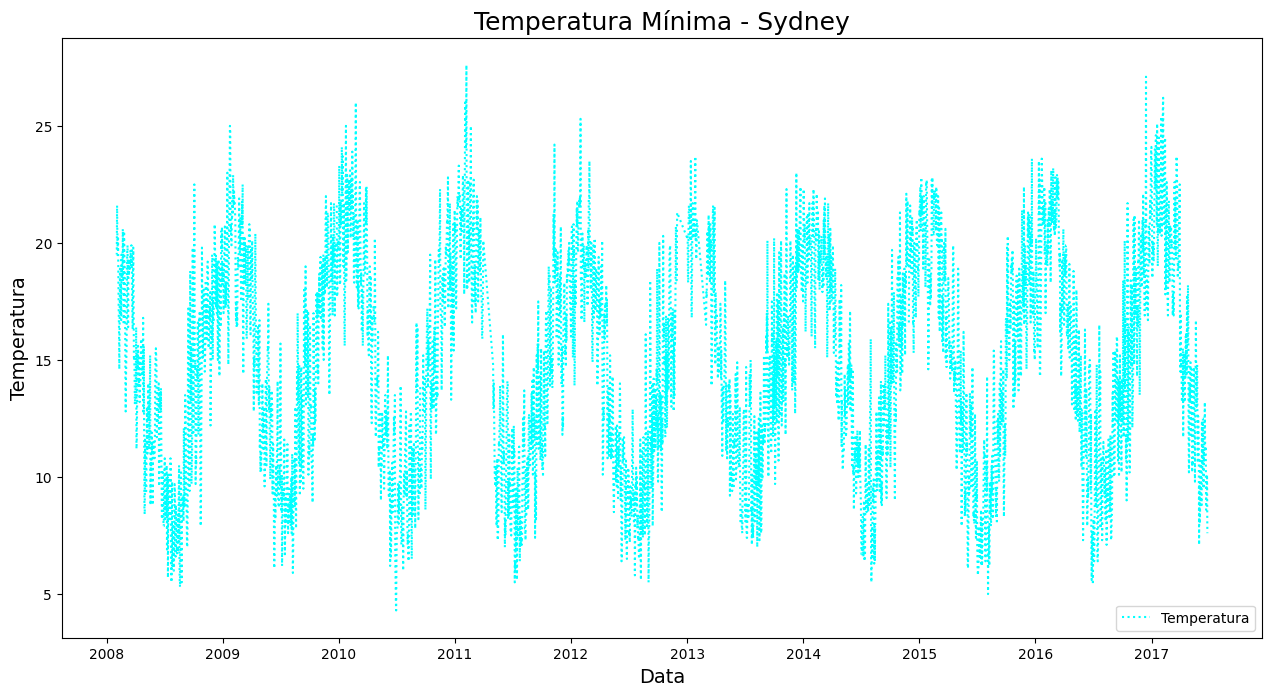

In [22]:
fig = plt.figure(figsize = (12,6))
eixo = fig.add_axes([0, 0, 1, 1])

eixo.plot(chuva_sydney['Date'], chuva_sydney['MinTemp'], color = 'aqua', ls = 'dotted')
eixo.set_title('Temperatura Mínima - Sydney', fontsize = 18)
eixo.set_ylabel('Temperatura', fontsize = 14)
eixo.set_xlabel('Data', fontsize = 14)
eixo.legend(['Temperatura'], loc = 'lower right', fontsize = 10);

In [23]:
import datetime

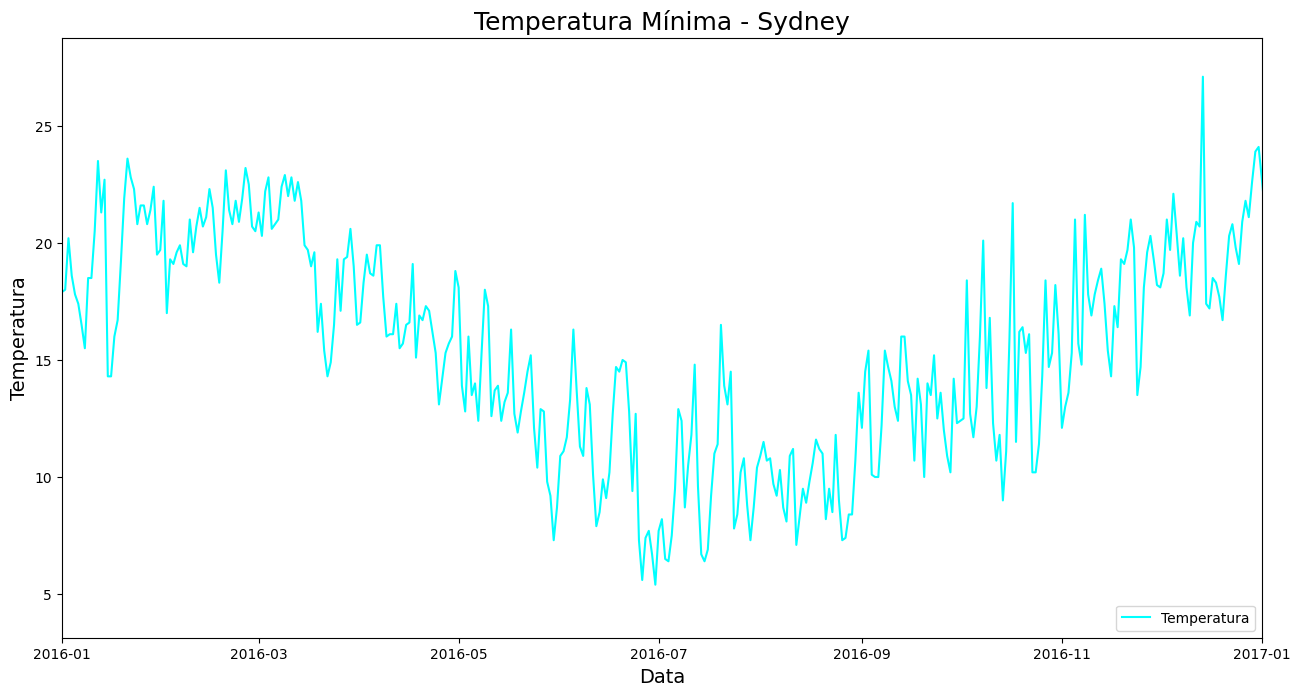

In [24]:
fig = plt.figure(figsize = (12,6))
eixo = fig.add_axes([0, 0, 1, 1])

eixo.plot(chuva_sydney['Date'], chuva_sydney['MinTemp'], color = 'aqua')
eixo.set_xlim(datetime.datetime(2016,1,1),datetime.datetime(2017,1,1))
eixo.set_title('Temperatura Mínima - Sydney', fontsize = 18)
eixo.set_ylabel('Temperatura', fontsize = 14)
eixo.set_xlabel('Data', fontsize = 14)
eixo.legend(['Temperatura'], loc = 'lower right', fontsize = 10);

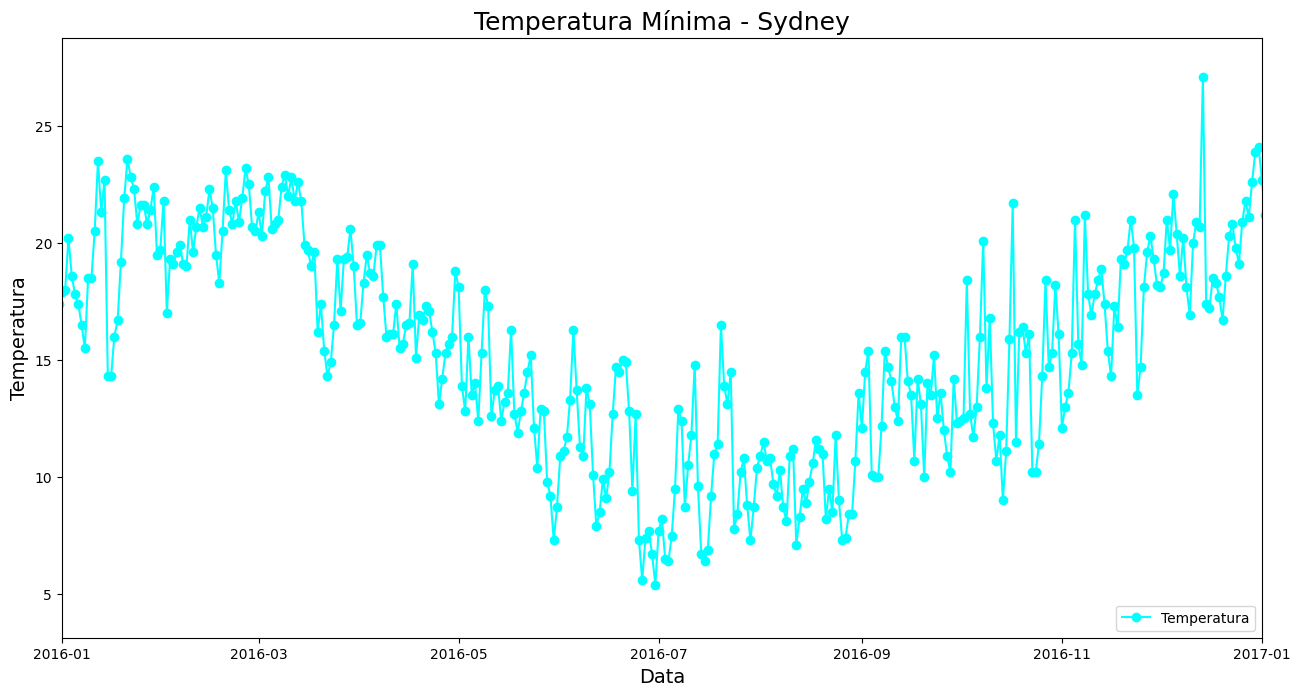

In [25]:
fig = plt.figure(figsize = (12,6))
eixo = fig.add_axes([0, 0, 1, 1])

eixo.plot(chuva_sydney['Date'], chuva_sydney['MinTemp'], color = 'aqua', marker = 'o')
eixo.set_xlim(datetime.datetime(2016,1,1),datetime.datetime(2017,1,1))
eixo.set_title('Temperatura Mínima - Sydney', fontsize = 18)
eixo.set_ylabel('Temperatura', fontsize = 14)
eixo.set_xlabel('Data', fontsize = 14)
eixo.legend(['Temperatura'], loc = 'lower right', fontsize = 10);

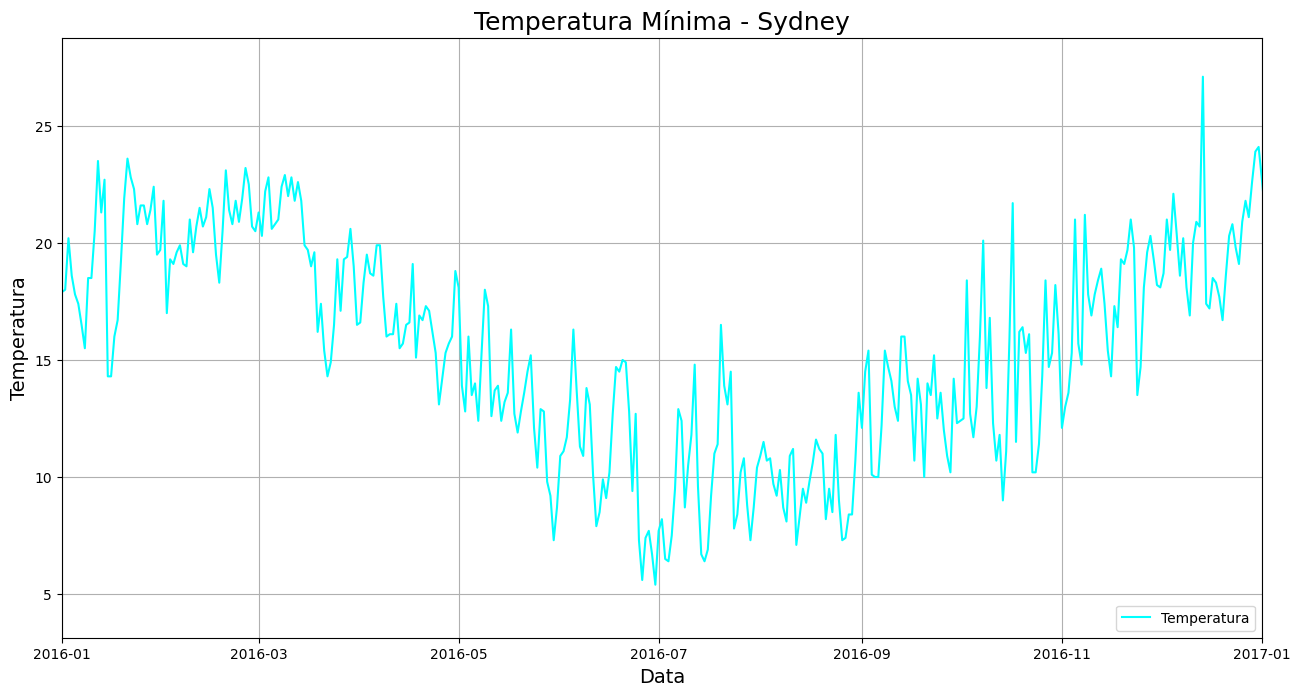

In [26]:
fig = plt.figure(figsize = (12,6))
eixo = fig.add_axes([0, 0, 1, 1])

eixo.plot(chuva_sydney['Date'], chuva_sydney['MinTemp'], color = 'aqua')
eixo.set_xlim(datetime.datetime(2016,1,1),datetime.datetime(2017,1,1))
eixo.set_title('Temperatura Mínima - Sydney', fontsize = 18)
eixo.set_ylabel('Temperatura', fontsize = 14)
eixo.set_xlabel('Data', fontsize = 14)
eixo.legend(['Temperatura'], loc = 'lower right', fontsize = 10)
eixo.grid(True);

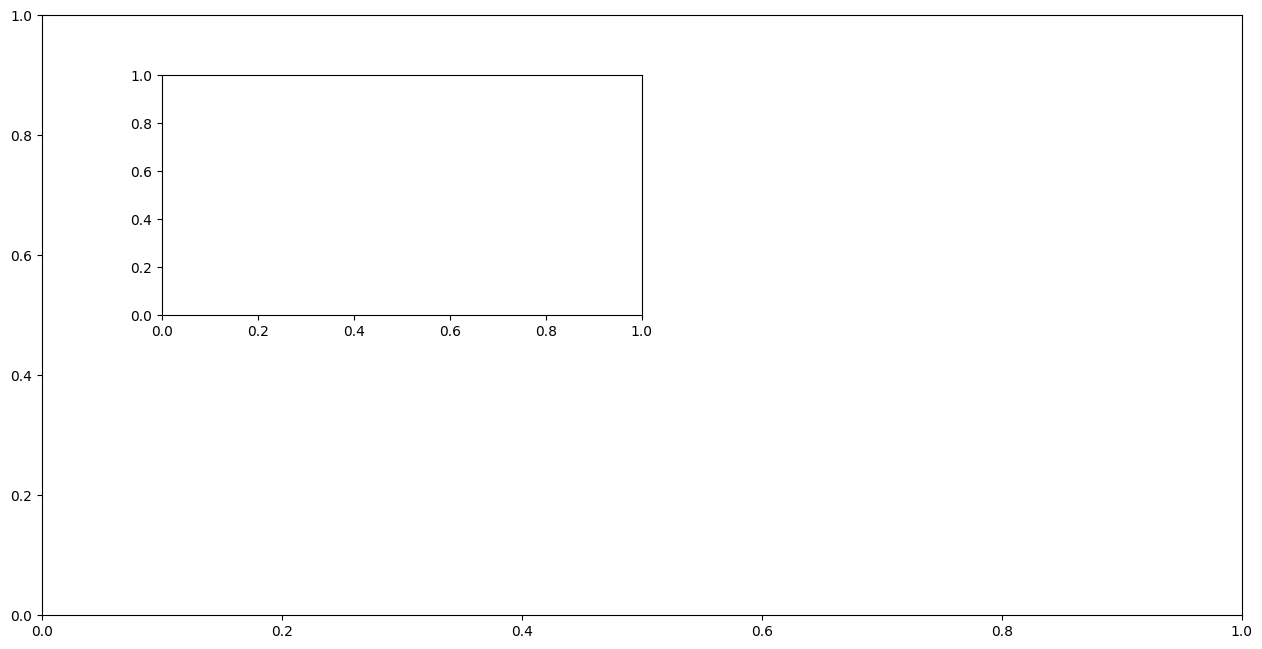

In [27]:
fig = plt.figure(figsize = (12,6))
eixo = fig.add_axes([0, 0, 1, 1])
eixo2 = fig.add_axes([0.1, 0.5, 0.4, 0.4])

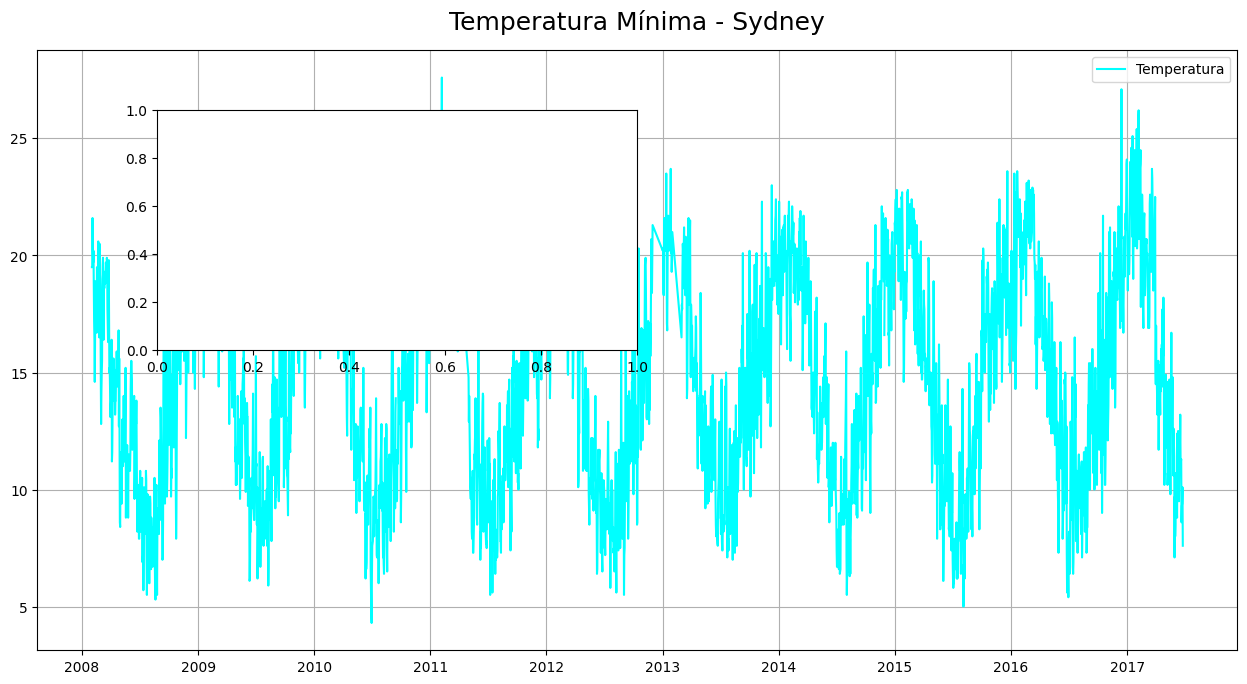

In [28]:
fig = plt.figure(figsize = (12,6))
eixo = fig.add_axes([0, 0, 1, 1])
eixo2 = fig.add_axes([0.1, 0.5, 0.4, 0.4])

eixo.grid(True)
eixo.plot(chuva_sydney['Date'], chuva_sydney['MinTemp'], color = 'aqua')
eixo.set_title('Temperatura Mínima - Sydney', fontsize = 18, pad = 15)
eixo.legend(['Temperatura'], loc = 'best', fontsize = 10);

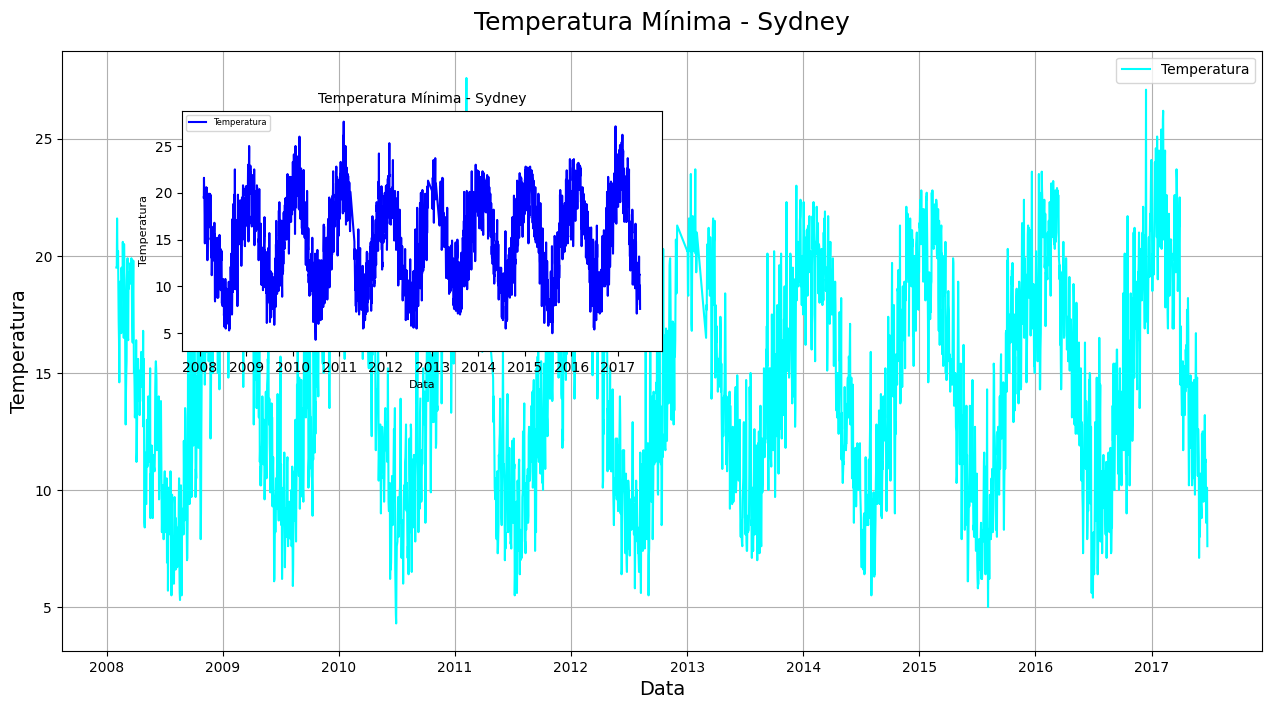

In [29]:
fig = plt.figure(figsize = (12,6))
eixo = fig.add_axes([0, 0, 1, 1])
eixo2 = fig.add_axes([0.1, 0.5, 0.4, 0.4])

eixo.grid(True)
eixo.plot(chuva_sydney['Date'], chuva_sydney['MinTemp'], color = 'aqua')
eixo.set_title('Temperatura Mínima - Sydney', fontsize = 18, pad = 15)
eixo.legend(['Temperatura'], loc = 'best', fontsize = 10)
eixo.set_ylabel('Temperatura', fontsize = 14)
eixo.set_xlabel('Data', fontsize = 14)

eixo2.plot(chuva_sydney['Date'], chuva_sydney['MinTemp'], color = 'b')
eixo2.set_title('Temperatura Mínima - Sydney', fontsize = 10)
eixo2.legend(['Temperatura'], loc = 'best', fontsize = 6)
eixo2.set_ylabel('Temperatura', fontsize = 8)
eixo2.set_xlabel('Data', fontsize = 8);

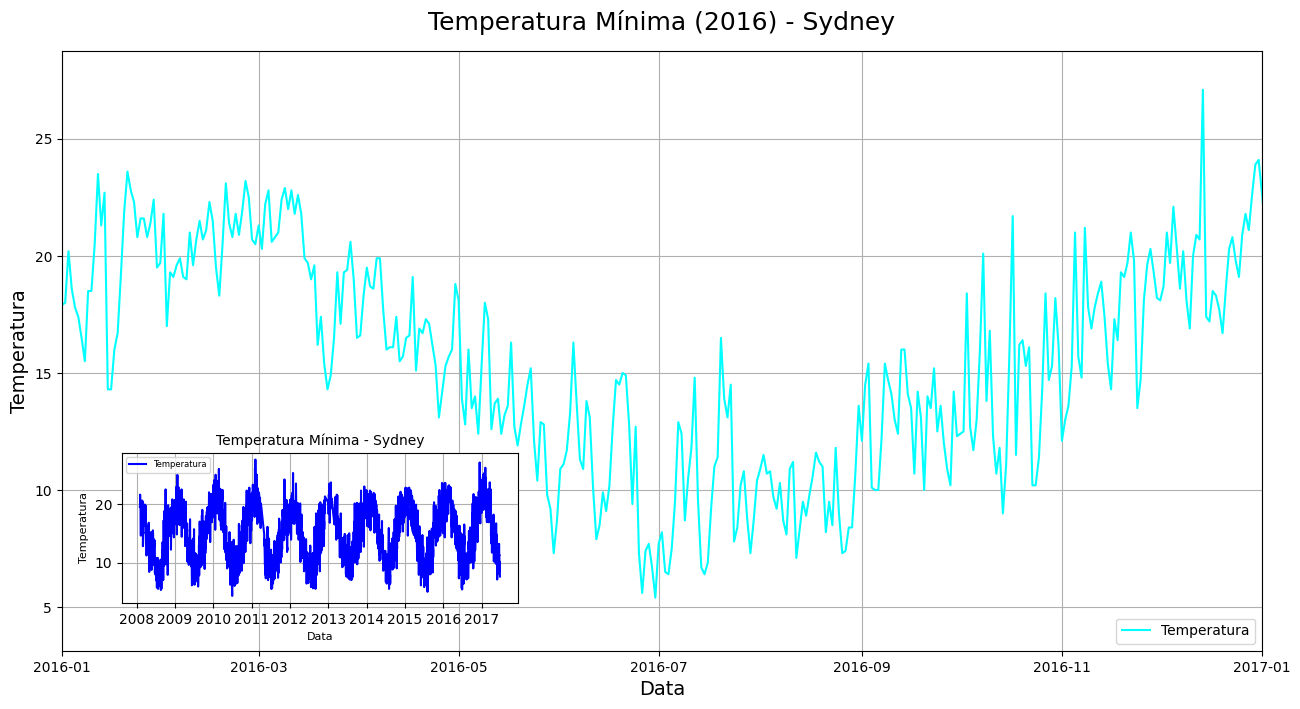

In [30]:
fig = plt.figure(figsize = (12,6))
eixo = fig.add_axes([0, 0, 1, 1])
eixo2 = fig.add_axes([0.05, 0.08, 0.33, 0.25])

eixo.grid(True)
eixo.plot(chuva_sydney['Date'], chuva_sydney['MinTemp'], color = 'aqua')
eixo.set_xlim(datetime.datetime(2016,1,1),datetime.datetime(2017,1,1))
eixo.set_title('Temperatura Mínima (2016) - Sydney', fontsize = 18, pad = 15)
eixo.legend(['Temperatura'], loc = 'lower right', fontsize = 10)
eixo.set_ylabel('Temperatura', fontsize = 14)
eixo.set_xlabel('Data', fontsize = 14)

eixo2.plot(chuva_sydney['Date'], chuva_sydney['MinTemp'], color = 'b')
eixo2.set_title('Temperatura Mínima - Sydney', fontsize = 10)
eixo2.legend(['Temperatura'], loc = 'best', fontsize = 6)
eixo2.set_ylabel('Temperatura', fontsize = 8)
eixo2.set_xlabel('Data', fontsize = 8)
eixo2.grid(True);

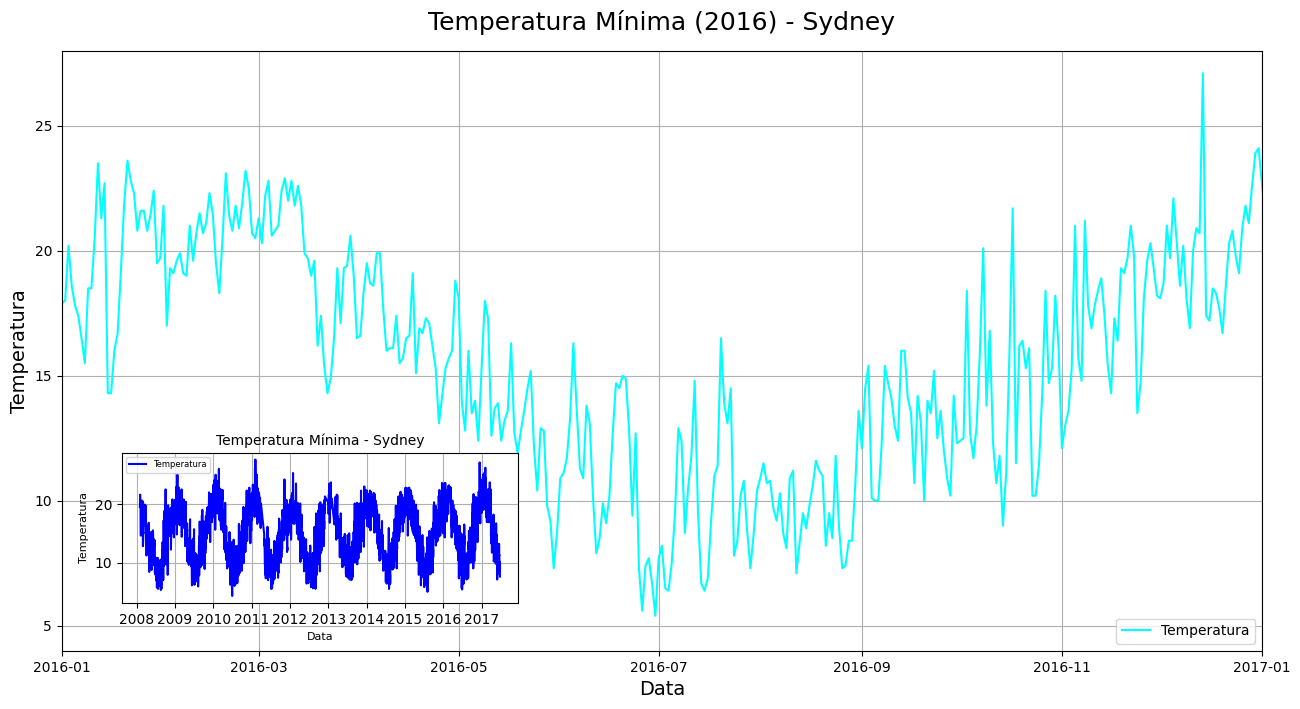

In [31]:
fig = plt.figure(figsize = (12,6))
eixo = fig.add_axes([0, 0, 1, 1])
eixo2 = fig.add_axes([0.05, 0.08, 0.33, 0.25])

eixo.grid(True)
eixo.plot(chuva_sydney['Date'], chuva_sydney['MinTemp'], color = 'aqua')
eixo.set_xlim(datetime.datetime(2016,1,1),datetime.datetime(2017,1,1))
eixo.set_ylim(4, 28)
eixo.set_title('Temperatura Mínima (2016) - Sydney', fontsize = 18, pad = 15)
eixo.legend(['Temperatura'], loc = 'lower right', fontsize = 10)
eixo.set_ylabel('Temperatura', fontsize = 14)
eixo.set_xlabel('Data', fontsize = 14)

eixo2.plot(chuva_sydney['Date'], chuva_sydney['MinTemp'], color = 'b')
eixo2.set_title('Temperatura Mínima - Sydney', fontsize = 10)
eixo2.legend(['Temperatura'], loc = 'best', fontsize = 6)
eixo2.set_ylabel('Temperatura', fontsize = 8)
eixo2.set_xlabel('Data', fontsize = 8)
eixo2.grid(True);

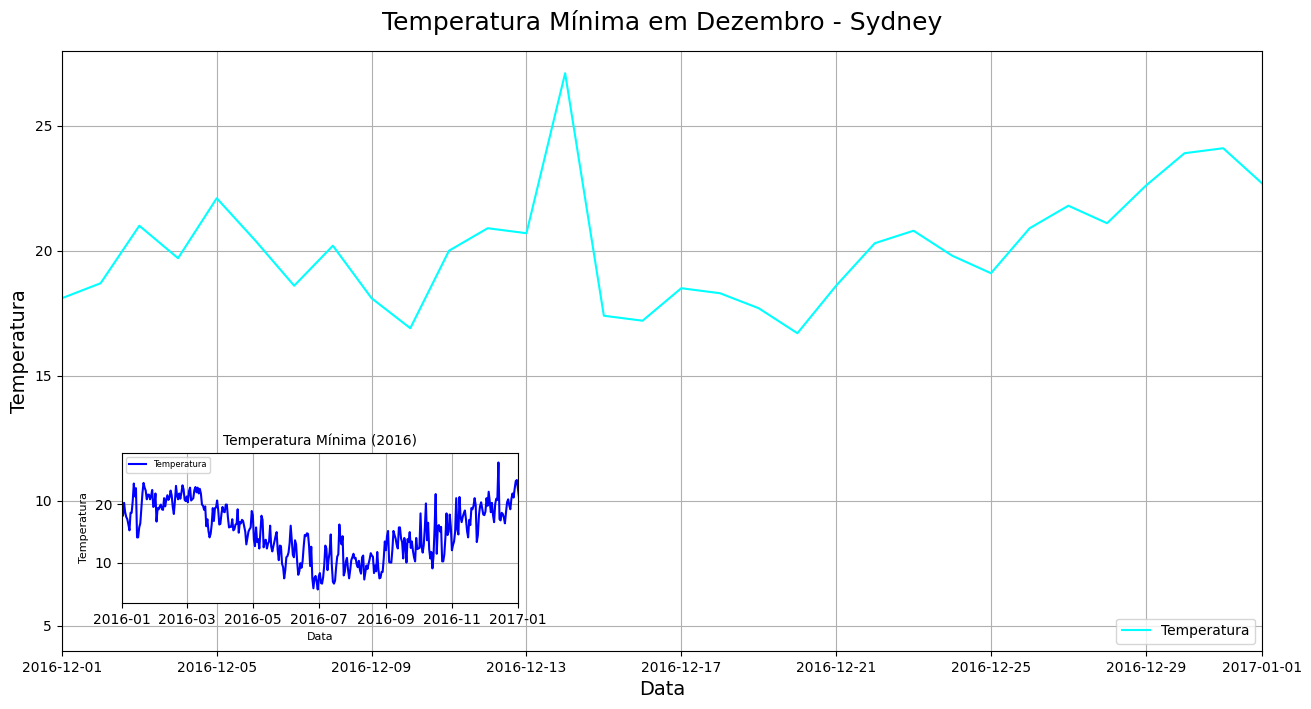

In [32]:
fig = plt.figure(figsize = (12,6))
eixo = fig.add_axes([0, 0, 1, 1])
eixo2 = fig.add_axes([0.05, 0.08, 0.33, 0.25])

eixo.grid(True)
eixo.plot(chuva_sydney['Date'], chuva_sydney['MinTemp'], color = 'aqua')
eixo.set_xlim(datetime.datetime(2016,12,1),datetime.datetime(2017,1,1))
eixo.set_ylim(4, 28)
eixo.set_title('Temperatura Mínima em Dezembro - Sydney', fontsize = 18, pad = 15)
eixo.legend(['Temperatura'], loc = 'lower right', fontsize = 10)
eixo.set_ylabel('Temperatura', fontsize = 14)
eixo.set_xlabel('Data', fontsize = 14)

eixo2.plot(chuva_sydney['Date'], chuva_sydney['MinTemp'], color = 'b')
eixo2.set_xlim(datetime.datetime(2016,1,1),datetime.datetime(2017,1,1))
eixo2.set_title('Temperatura Mínima (2016)', fontsize = 10)
eixo2.legend(['Temperatura'], loc = 'best', fontsize = 6)
eixo2.set_ylabel('Temperatura', fontsize = 8)
eixo2.set_xlabel('Data', fontsize = 8)
eixo2.grid(True);

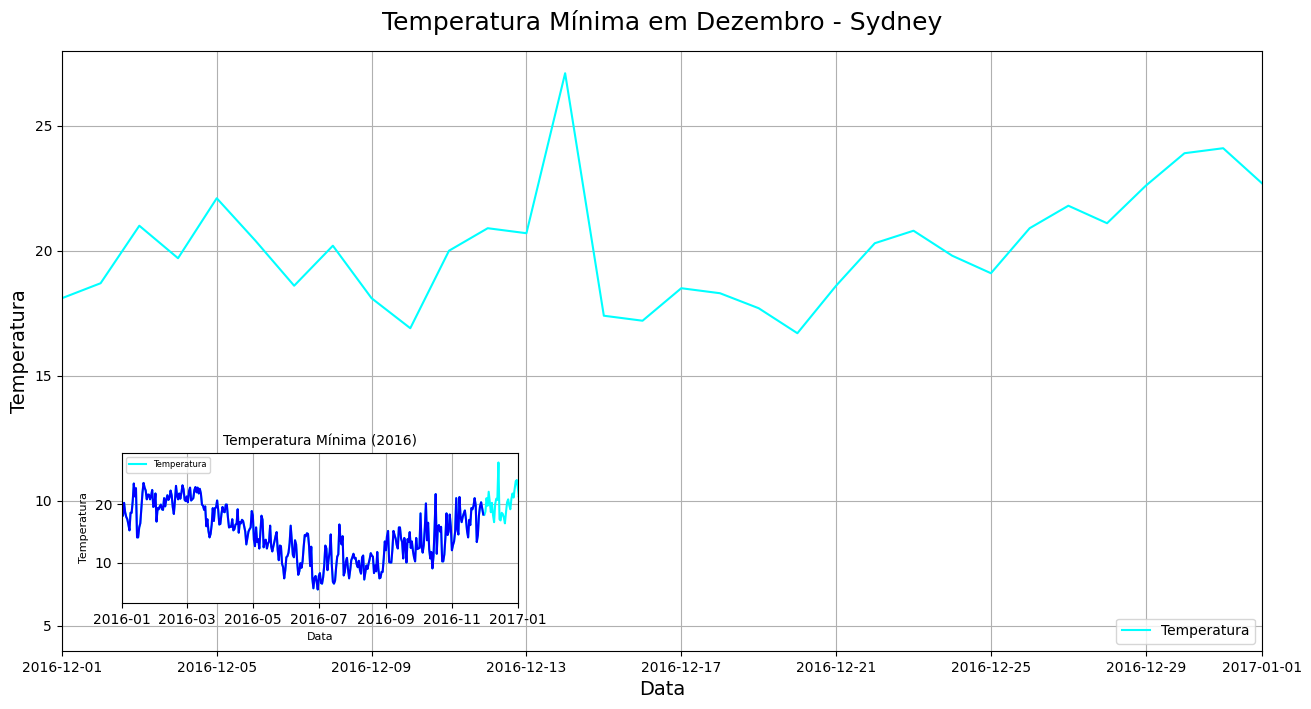

In [33]:
fig = plt.figure(figsize = (12,6))
eixo = fig.add_axes([0, 0, 1, 1])
eixo2 = fig.add_axes([0.05, 0.08, 0.33, 0.25])

eixo.grid(True)
eixo.plot(chuva_sydney['Date'], chuva_sydney['MinTemp'], color = 'aqua')
eixo.set_xlim(datetime.datetime(2016,12,1),datetime.datetime(2017,1,1))
eixo.set_ylim(4, 28)
eixo.set_title('Temperatura Mínima em Dezembro - Sydney', fontsize = 18, pad = 15)
eixo.legend(['Temperatura'], loc = 'lower right', fontsize = 10)
eixo.set_ylabel('Temperatura', fontsize = 14)
eixo.set_xlabel('Data', fontsize = 14)

periodo_esquerda = chuva_sydney['Date'] < datetime.datetime(2016,12,1)
periodo_direita = chuva_sydney['Date'] > datetime.datetime(2017,1,1)

eixo2.plot(chuva_sydney['Date'], chuva_sydney['MinTemp'], color = 'aqua')
eixo2.plot(chuva_sydney[periodo_esquerda]['Date'],chuva_sydney[periodo_esquerda]['MinTemp'], color = 'b')
eixo2.plot(chuva_sydney[periodo_direita]['Date'], chuva_sydney[periodo_direita]['MinTemp'], color = 'b')
eixo2.set_xlim(datetime.datetime(2016,1,1),datetime.datetime(2017,1,1))
eixo2.set_title('Temperatura Mínima (2016)', fontsize = 10)
eixo2.legend(['Temperatura'], loc = 'best', fontsize = 6)
eixo2.set_ylabel('Temperatura', fontsize = 8)
eixo2.set_xlabel('Data', fontsize = 8)
eixo2.grid(True);

# Adicionando anotações e outras visualizações:

In [34]:
melbourne = chuva.groupby('Location').get_group('Melbourne')
melbourne

Date   Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
67200 2008-07-01  Melbourne      9.5     15.4       2.0          2.8   
67201 2008-07-02  Melbourne     11.0     14.5       0.6          5.2   
67202 2008-07-03  Melbourne      8.4     14.1       1.4          2.0   
67203 2008-07-04  Melbourne      9.1     14.5       0.6          1.8   
67204 2008-07-05  Melbourne      4.3     15.5       0.0          0.8   
...          ...        ...      ...      ...       ...          ...   
70388 2017-06-21  Melbourne      7.8     13.5       0.6          0.6   
70389 2017-06-22  Melbourne      6.7     14.1       0.2          0.6   
70390 2017-06-23  Melbourne      7.4     14.9       0.0          1.6   
70391 2017-06-24  Melbourne      8.3     12.3       1.4          1.8   
70392 2017-06-25  Melbourne      8.6     14.3       0.0          2.8   

       Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
67200       7.0           W           63.0          W  ...        60.0   
67201       4.0           W           63.0          W  ...        66.0   
67202       0.8           W           39.0          W  ...        72.0   
67203       4.2           E           19.0        NNW  ...        87.0   
67204       8.4           N           52.0          N  ...        81.0   
...         ...         ...            ...        ...  ...         ...   
70388       0.0         NNW           24.0          W  ...       100.0   
70389       0.0           N           24.0        NNE  ...        93.0   
70390       6.0         NNW           44.0          N  ...        77.0   
70391       5.6          SW           30.0        WNW  ...        75.0   
70392       3.8          NW           35.0          N  ...        67.0   

       Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
67200         38.0       1006.8       1010.3       1.0       7.0     11.0   
67201         52.0       1013.4       1016.2       7.0       4.0     11.8   
67202         58.0       1024.8       1024.3       7.0       7.0     10.6   
67203         49.0       1030.2       1029.0       7.0       6.0     10.2   
67204         52.0       1028.9       1024.9       2.0       5.0      5.5   
...            ...          ...          ...       ...       ...      ...   
70388         80.0       1028.8       1028.4       7.0       7.0     11.2   
70389         56.0       1028.2       1024.8       7.0       7.0      7.5   
70390         63.0       1018.8       1013.8       1.0       7.0      9.1   
70391         63.0       1018.7       1017.4       2.0       7.0      9.6   
70392         56.0       1017.4       1015.0       7.0       7.0      9.3   

       Temp3pm  RainToday  RainTomorrow  
67200     14.6        Yes            No  
67201     13.7         No           Yes  
67202     13.9        Yes            No  
67203     13.1         No            No  
67204     14.6         No            No  
...        ...        ...           ...  
70388     12.7         No            No  
70389     13.5         No            No  
70390     12.5         No           Yes  
70391     11.2        Yes            No  
70392     13.4         No           Yes  

[3193 rows x 23 columns]

In [35]:
melbourne.sort_values('Date')

Date   Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
67200 2008-07-01  Melbourne      9.5     15.4       2.0          2.8   
67201 2008-07-02  Melbourne     11.0     14.5       0.6          5.2   
67202 2008-07-03  Melbourne      8.4     14.1       1.4          2.0   
67203 2008-07-04  Melbourne      9.1     14.5       0.6          1.8   
67204 2008-07-05  Melbourne      4.3     15.5       0.0          0.8   
...          ...        ...      ...      ...       ...          ...   
70388 2017-06-21  Melbourne      7.8     13.5       0.6          0.6   
70389 2017-06-22  Melbourne      6.7     14.1       0.2          0.6   
70390 2017-06-23  Melbourne      7.4     14.9       0.0          1.6   
70391 2017-06-24  Melbourne      8.3     12.3       1.4          1.8   
70392 2017-06-25  Melbourne      8.6     14.3       0.0          2.8   

       Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
67200       7.0           W           63.0          W  ...        60.0   
67201       4.0           W           63.0          W  ...        66.0   
67202       0.8           W           39.0          W  ...        72.0   
67203       4.2           E           19.0        NNW  ...        87.0   
67204       8.4           N           52.0          N  ...        81.0   
...         ...         ...            ...        ...  ...         ...   
70388       0.0         NNW           24.0          W  ...       100.0   
70389       0.0           N           24.0        NNE  ...        93.0   
70390       6.0         NNW           44.0          N  ...        77.0   
70391       5.6          SW           30.0        WNW  ...        75.0   
70392       3.8          NW           35.0          N  ...        67.0   

       Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
67200         38.0       1006.8       1010.3       1.0       7.0     11.0   
67201         52.0       1013.4       1016.2       7.0       4.0     11.8   
67202         58.0       1024.8       1024.3       7.0       7.0     10.6   
67203         49.0       1030.2       1029.0       7.0       6.0     10.2   
67204         52.0       1028.9       1024.9       2.0       5.0      5.5   
...            ...          ...          ...       ...       ...      ...   
70388         80.0       1028.8       1028.4       7.0       7.0     11.2   
70389         56.0       1028.2       1024.8       7.0       7.0      7.5   
70390         63.0       1018.8       1013.8       1.0       7.0      9.1   
70391         63.0       1018.7       1017.4       2.0       7.0      9.6   
70392         56.0       1017.4       1015.0       7.0       7.0      9.3   

       Temp3pm  RainToday  RainTomorrow  
67200     14.6        Yes            No  
67201     13.7         No           Yes  
67202     13.9        Yes            No  
67203     13.1         No            No  
67204     14.6         No            No  
...        ...        ...           ...  
70388     12.7         No            No  
70389     13.5         No            No  
70390     12.5         No           Yes  
70391     11.2        Yes            No  
70392     13.4         No           Yes  

[3193 rows x 23 columns]

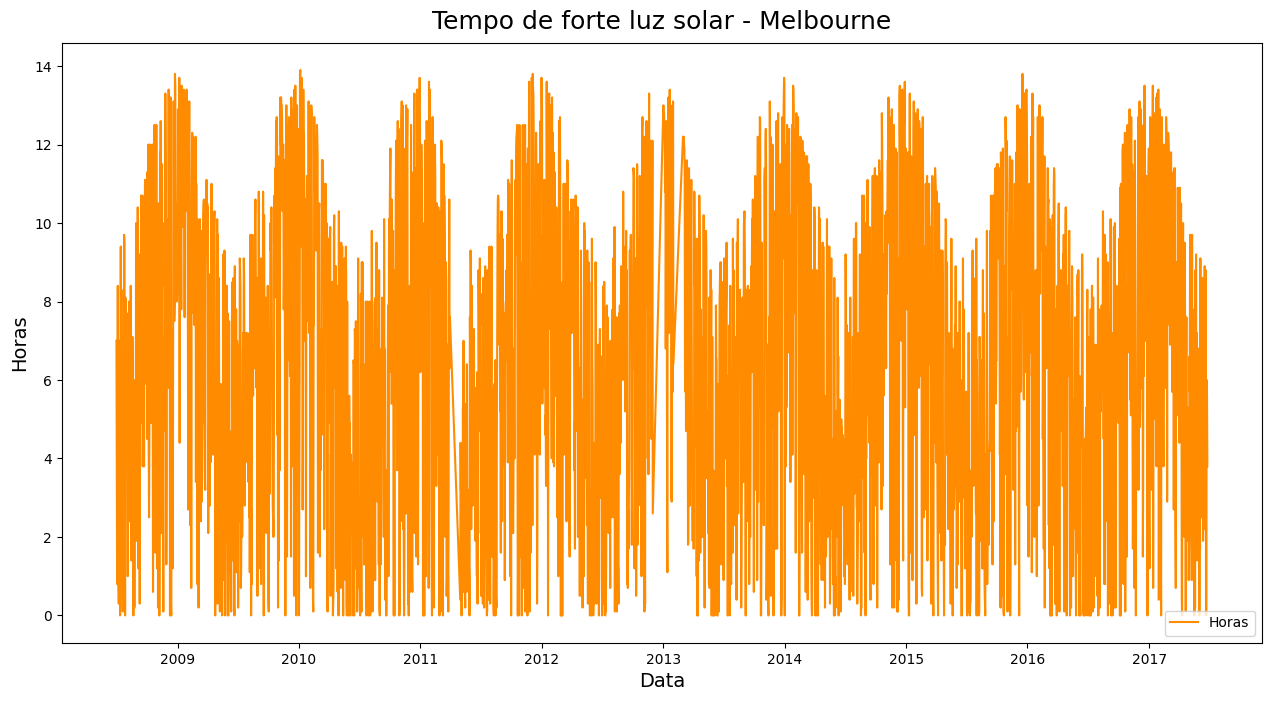

In [36]:
fig = plt.figure(figsize = (12,6))
eixo = fig.add_axes([0, 0, 1, 1])

eixo.plot(melbourne['Date'], melbourne['Sunshine'], color = 'darkorange')
eixo.set_title('Tempo de forte luz solar - Melbourne', fontsize = 18, pad = 10)
eixo.set_xlabel('Data', fontsize = 14)
eixo.set_ylabel('Horas', fontsize = 14)
eixo.legend(['Horas'], loc = 'lower right', fontsize = 10);

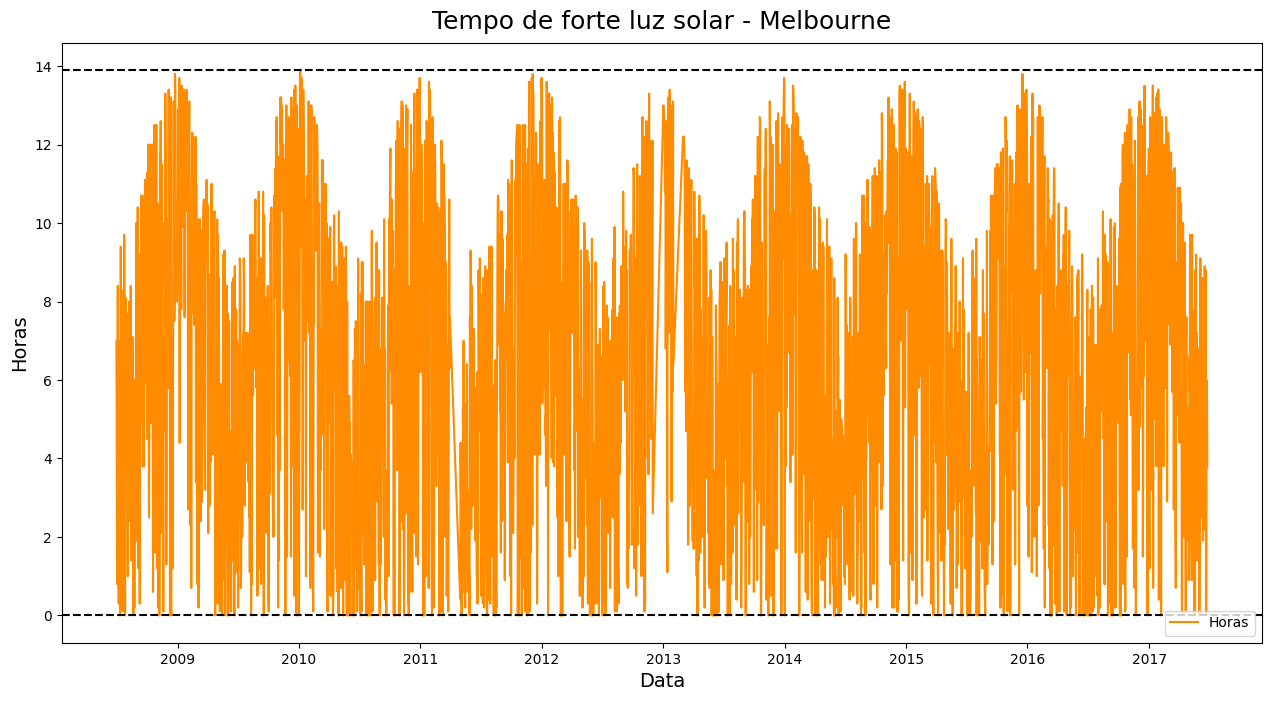

In [37]:
fig = plt.figure(figsize = (12,6))
eixo = fig.add_axes([0, 0, 1, 1])

eixo.plot(melbourne['Date'], melbourne['Sunshine'], color = 'darkorange')
eixo.set_title('Tempo de forte luz solar - Melbourne', fontsize = 18, pad = 10)
eixo.set_xlabel('Data', fontsize = 14)
eixo.set_ylabel('Horas', fontsize = 14)
eixo.legend(['Horas'], loc = 'lower right', fontsize = 10)
eixo.axhline(max(melbourne['Sunshine']), color = 'k', linestyle = '--')
eixo.axhline(min(melbourne['Sunshine']), color = 'k', linestyle = '--');

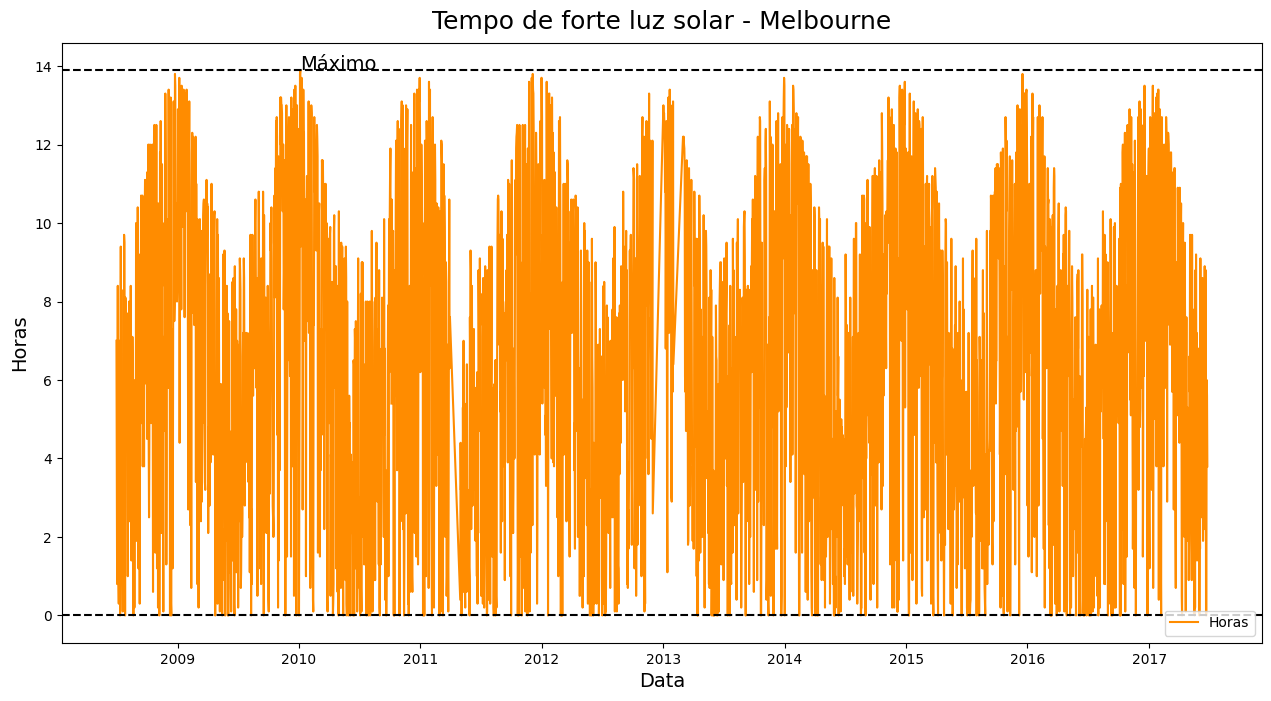

In [38]:
fig = plt.figure(figsize = (12,6))
eixo = fig.add_axes([0, 0, 1, 1])

eixo.plot(melbourne['Date'], melbourne['Sunshine'], color = 'darkorange')
eixo.set_title('Tempo de forte luz solar - Melbourne', fontsize = 18, pad = 10)
eixo.set_xlabel('Data', fontsize = 14)
eixo.set_ylabel('Horas', fontsize = 14)
eixo.legend(['Horas'], loc = 'lower right', fontsize = 10)

x1 = melbourne['Date'][melbourne['Sunshine'].idxmax()]
y1 = max(melbourne['Sunshine'])

eixo.annotate('Máximo', xy = (x1,y1), fontsize = 14)

eixo.axhline(max(melbourne['Sunshine']), color = 'k', linestyle = '--')
eixo.axhline(min(melbourne['Sunshine']), color = 'k', linestyle = '--');

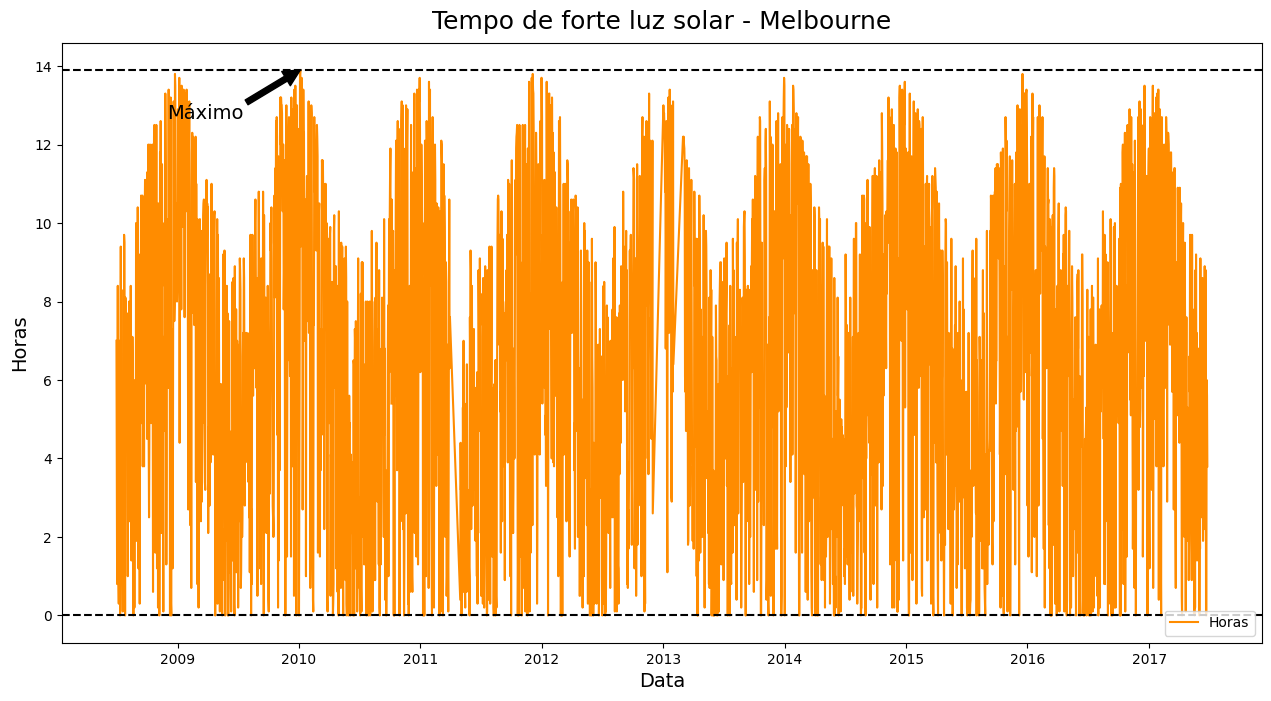

In [39]:
fig = plt.figure(figsize = (12,6))
eixo = fig.add_axes([0, 0, 1, 1])

eixo.plot(melbourne['Date'], melbourne['Sunshine'], color = 'darkorange')
eixo.set_title('Tempo de forte luz solar - Melbourne', fontsize = 18, pad = 10)
eixo.set_xlabel('Data', fontsize = 14)
eixo.set_ylabel('Horas', fontsize = 14)
eixo.legend(['Horas'], loc = 'lower right', fontsize = 10)

x1 = melbourne['Date'][melbourne['Sunshine'].idxmax()]
y1 = max(melbourne['Sunshine'])

x2 = melbourne['Date'][melbourne['Sunshine'].idxmax() - 400]
y2 = max(melbourne['Sunshine']) - 1.25

eixo.annotate('Máximo', xy = (x1,y1), fontsize = 14, xytext = (x2,y2), arrowprops = dict(facecolor = 'k'))

eixo.axhline(max(melbourne['Sunshine']), color = 'k', linestyle = '--')
eixo.axhline(min(melbourne['Sunshine']), color = 'k', linestyle = '--');

In [40]:
brisbane = chuva.groupby('Location').get_group('Brisbane')
brisbane

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
84007 2008-07-01  Brisbane     10.3     25.2       0.0          1.4       9.5   
84008 2008-07-02  Brisbane      8.1     22.9       0.0          2.0       9.8   
84009 2008-07-03  Brisbane      9.7     22.4       0.0          5.8       9.4   
84010 2008-07-04  Brisbane     11.8     20.0       0.8          1.8       1.1   
84011 2008-07-05  Brisbane     12.3     16.7       0.0          2.0       0.3   
...          ...       ...      ...      ...       ...          ...       ...   
87195 2017-06-21  Brisbane     12.2     23.4       0.0          4.0       9.2   
87196 2017-06-22  Brisbane     13.7     22.7       0.0          3.4       7.2   
87197 2017-06-23  Brisbane     10.3     23.7       0.0          3.2       9.4   
87198 2017-06-24  Brisbane     10.4     24.5       0.0          3.4       8.9   
87199 2017-06-25  Brisbane     11.0     24.2       0.0          2.2       9.8   

      WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
84007         WNW           26.0        SSW  ...        81.0         37.0   
84008           W           30.0          W  ...        41.0         30.0   
84009           E           22.0         SW  ...        55.0         52.0   
84010          SW           24.0         SW  ...        76.0         53.0   
84011           S           37.0          S  ...        81.0         89.0   
...           ...            ...        ...  ...         ...          ...   
87195         WSW           20.0         SW  ...        61.0         44.0   
87196          SE           20.0         SW  ...        62.0         55.0   
87197           W           24.0         SW  ...        71.0         37.0   
87198           S           17.0          S  ...        75.0         33.0   
87199         ENE           20.0        SSW  ...        68.0         53.0   

       Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
84007       1019.6       1014.8       0.0       1.0     14.9     24.6   
84008       1018.8       1015.0       0.0       0.0     16.2     22.4   
84009       1021.4       1019.1       1.0       4.0     15.4     21.3   
84010       1023.5       1021.7       7.0       7.0     14.1     19.6   
84011       1027.3       1026.2       7.0       8.0     16.1     15.0   
...            ...          ...       ...       ...      ...      ...   
87195       1023.4       1021.3       1.0       4.0     17.2     23.3   
87196       1026.0       1022.4       2.0       3.0     17.8     20.5   
87197       1023.3       1018.4       1.0       3.0     15.2     23.1   
87198       1018.6       1015.4       7.0       5.0     14.3     24.0   
87199       1020.5       1017.3       6.0       3.0     15.9     22.6   

       RainToday  RainTomorrow  
84007         No            No  
84008         No            No  
84009         No            No  
84010         No            No  
84011         No           Yes  
...          ...           ...  
87195         No            No  
87196         No            No  
87197         No            No  
87198         No            No  
87199         No            No  

[3193 rows x 23 columns]

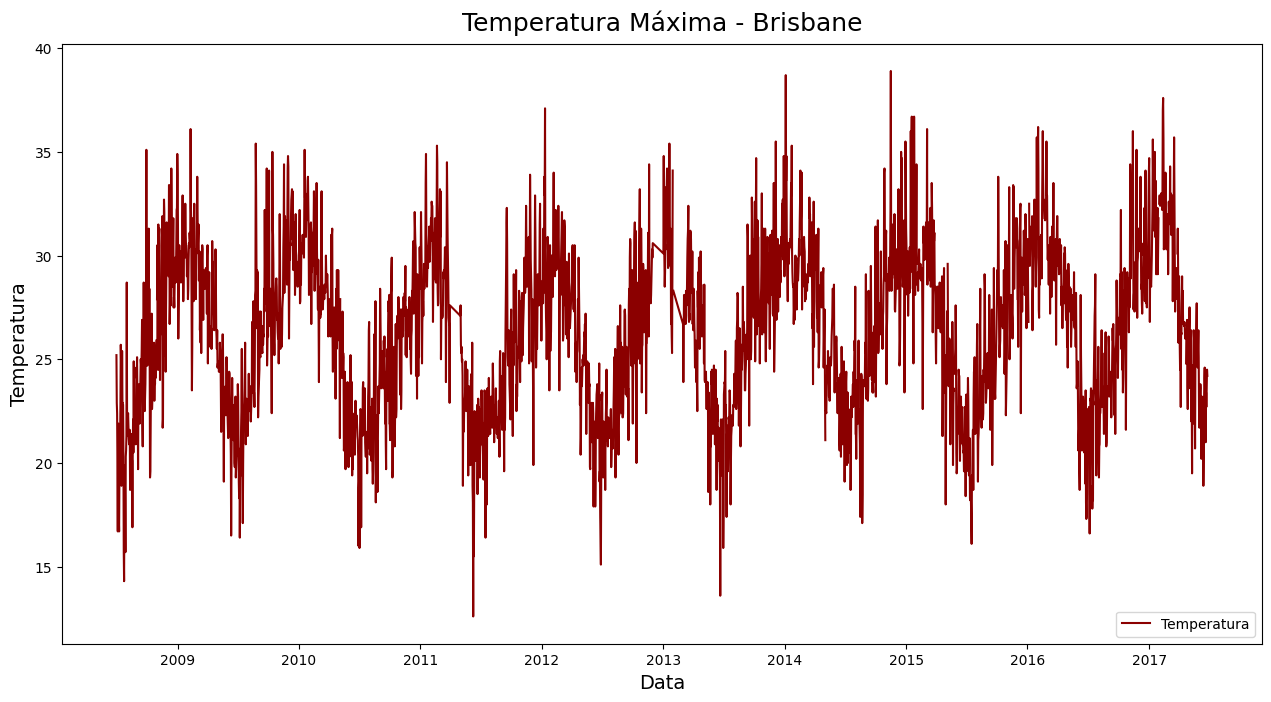

In [41]:
fig = plt.figure(figsize = (12,6))
eixo = fig.add_axes([0, 0, 1, 1])

eixo.plot(brisbane['Date'], brisbane['MaxTemp'], color = 'darkred')
eixo.set_title('Temperatura Máxima - Brisbane', fontsize = 18, pad = 10)
eixo.set_xlabel('Data', fontsize = 14)
eixo.set_ylabel('Temperatura', fontsize = 14)
eixo.legend(['Temperatura'], loc = 'lower right', fontsize = 10);

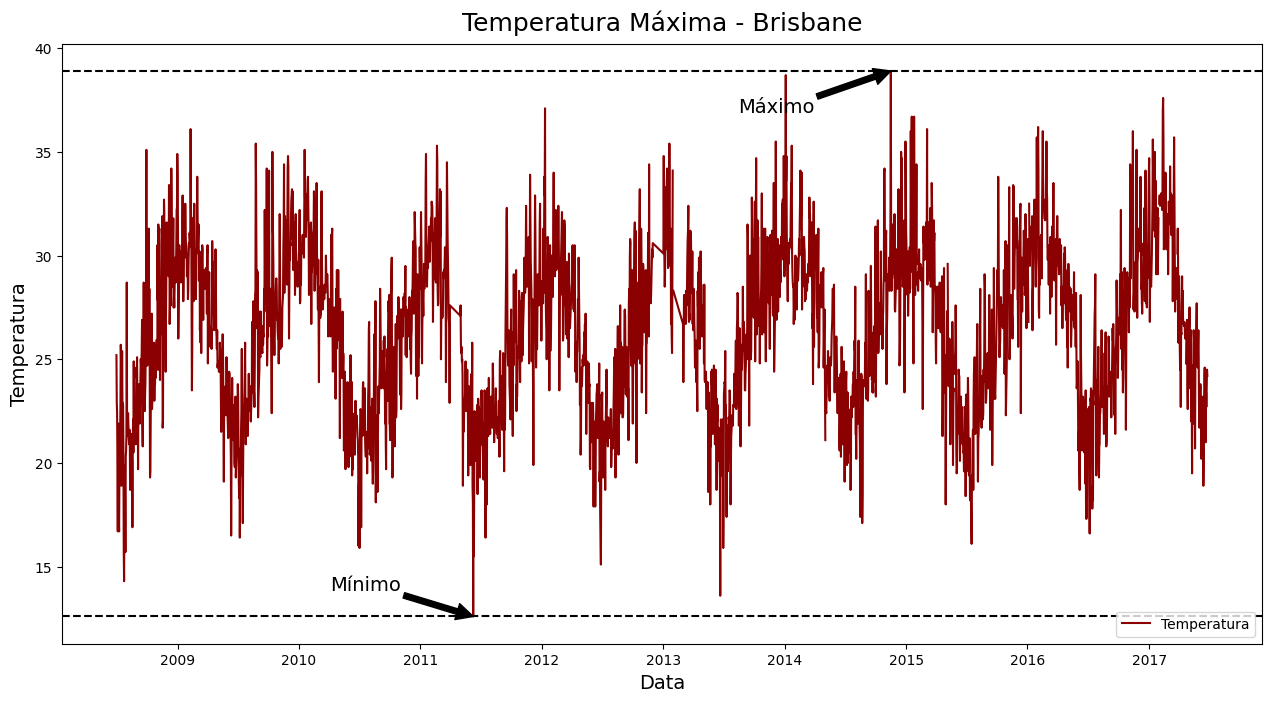

In [42]:
fig = plt.figure(figsize = (12,6))
eixo = fig.add_axes([0, 0, 1, 1])

eixo.plot(brisbane['Date'], brisbane['MaxTemp'], color = 'darkred')
eixo.set_title('Temperatura Máxima - Brisbane', fontsize = 18, pad = 10)
eixo.set_xlabel('Data', fontsize = 14)
eixo.set_ylabel('Temperatura', fontsize = 14)
eixo.legend(['Temperatura'], loc = 'lower right', fontsize = 10)

x1 = brisbane['Date'][brisbane['MaxTemp'].idxmax()]
y1 = max(brisbane['MaxTemp'])

x2 = brisbane['Date'][brisbane['MaxTemp'].idxmax() - 460]
y2 = max(brisbane['MaxTemp']) - 2

eixo.annotate('Máximo', xy = (x1,y1), fontsize = 14, xytext = (x2,y2), arrowprops = dict(facecolor = 'k'))

x1 = brisbane['Date'][brisbane['MaxTemp'].idxmin()]
y1 = min(brisbane['MaxTemp'])

x2 = brisbane['Date'][brisbane['MaxTemp'].idxmin() - 400]
y2 = min(brisbane['MaxTemp']) + 1.25

eixo.annotate('Mínimo', xy = (x1,y1), fontsize = 14, xytext = (x2,y2), arrowprops = dict(facecolor = 'k'))

eixo.axhline(max(brisbane['MaxTemp']), color = 'k', linestyle = '--')
eixo.axhline(min(brisbane['MaxTemp']), color = 'k', linestyle = '--');

---

In [43]:
empresa = pd.read_csv('/kaggle/input/steel-industry-energy-consumption/Steel_industry_data.csv')
empresa.head()

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0  01/01/2018 00:15       3.17                                  2.95   
1  01/01/2018 00:30       4.00                                  4.46   
2  01/01/2018 00:45       3.24                                  3.28   
3  01/01/2018 01:00       3.31                                  3.56   
4  01/01/2018 01:15       3.82                                  4.50   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                   0.0        0.0   
1                                   0.0        0.0   
2                                   0.0        0.0   
3                                   0.0        0.0   
4                                   0.0        0.0   

   Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
0                         73.21                         100.0   900   
1                         66.77                         100.0  1800   
2                         70.28                         100.0  2700   
3                         68.09                         100.0  3600   
4                         64.72                         100.0  4500   

  WeekStatus Day_of_week   Load_Type  
0    Weekday      Monday  Light_Load  
1    Weekday      Monday  Light_Load  
2    Weekday      Monday  Light_Load  
3    Weekday      Monday  Light_Load  
4    Weekday      Monday  Light_Load

**Date** Dados de tempo contínuo obtidos no primeiro dia do mês

**Usage_kWh** Consumo de energia da indústria contínuo (kWh)

**Lagging_Current** Potência reativa atrasada atual contínuo (kVarh)

**Leading_Current** Potência reativa avançada de corrente Contínuo (kVarh)

**CO2** ppm contínuo

**NSM** Number of Seconds from midnight Continuous S - Número de segundos a partir da meia-noite Contínuo S Status

**WeekStatus** fim de semana (0) ou a Dia da semana(1)

**Day_of_week** Domingo, Segunda-feira, até Sábado

**Load_Type** Carga Leve, Carga Média, Carga Máxima

In [44]:
empresa

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0      01/01/2018 00:15       3.17                                  2.95   
1      01/01/2018 00:30       4.00                                  4.46   
2      01/01/2018 00:45       3.24                                  3.28   
3      01/01/2018 01:00       3.31                                  3.56   
4      01/01/2018 01:15       3.82                                  4.50   
...                 ...        ...                                   ...   
35035  31/12/2018 23:00       3.85                                  4.86   
35036  31/12/2018 23:15       3.74                                  3.74   
35037  31/12/2018 23:30       3.78                                  3.17   
35038  31/12/2018 23:45       3.78                                  3.06   
35039  31/12/2018 00:00       3.67                                  3.02   

       Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                      0.00        0.0   
1                                      0.00        0.0   
2                                      0.00        0.0   
3                                      0.00        0.0   
4                                      0.00        0.0   
...                                     ...        ...   
35035                                  0.00        0.0   
35036                                  0.00        0.0   
35037                                  0.07        0.0   
35038                                  0.11        0.0   
35039                                  0.07        0.0   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor    NSM  \
0                             73.21                        100.00    900   
1                             66.77                        100.00   1800   
2                             70.28                        100.00   2700   
3                             68.09                        100.00   3600   
4                             64.72                        100.00   4500   
...                             ...                           ...    ...   
35035                         62.10                        100.00  82800   
35036                         70.71                        100.00  83700   
35037                         76.62                         99.98  84600   
35038                         77.72                         99.96  85500   
35039                         77.22                         99.98      0   

      WeekStatus Day_of_week   Load_Type  
0        Weekday      Monday  Light_Load  
1        Weekday      Monday  Light_Load  
2        Weekday      Monday  Light_Load  
3        Weekday      Monday  Light_Load  
4        Weekday      Monday  Light_Load  
...          ...         ...         ...  
35035    Weekday      Monday  Light_Load  
35036    Weekday      Monday  Light_Load  
35037    Weekday      Monday  Light_Load  
35038    Weekday      Monday  Light_Load  
35039    Weekday      Monday  Light_Load  

[35040 rows x 11 columns]

In [45]:
empresa = empresa.sort_values('date')
empresa

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
95     01/01/2018 00:00       3.42                                  3.46   
0      01/01/2018 00:15       3.17                                  2.95   
1      01/01/2018 00:30       4.00                                  4.46   
2      01/01/2018 00:45       3.24                                  3.28   
3      01/01/2018 01:00       3.31                                  3.56   
...                 ...        ...                                   ...   
35034  31/12/2018 22:45       3.82                                  4.54   
35035  31/12/2018 23:00       3.85                                  4.86   
35036  31/12/2018 23:15       3.74                                  3.74   
35037  31/12/2018 23:30       3.78                                  3.17   
35038  31/12/2018 23:45       3.78                                  3.06   

       Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
95                                     0.00        0.0   
0                                      0.00        0.0   
1                                      0.00        0.0   
2                                      0.00        0.0   
3                                      0.00        0.0   
...                                     ...        ...   
35034                                  0.00        0.0   
35035                                  0.00        0.0   
35036                                  0.00        0.0   
35037                                  0.07        0.0   
35038                                  0.11        0.0   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor    NSM  \
95                            70.30                        100.00      0   
0                             73.21                        100.00    900   
1                             66.77                        100.00   1800   
2                             70.28                        100.00   2700   
3                             68.09                        100.00   3600   
...                             ...                           ...    ...   
35034                         64.38                        100.00  81900   
35035                         62.10                        100.00  82800   
35036                         70.71                        100.00  83700   
35037                         76.62                         99.98  84600   
35038                         77.72                         99.96  85500   

      WeekStatus Day_of_week   Load_Type  
95       Weekday      Monday  Light_Load  
0        Weekday      Monday  Light_Load  
1        Weekday      Monday  Light_Load  
2        Weekday      Monday  Light_Load  
3        Weekday      Monday  Light_Load  
...          ...         ...         ...  
35034    Weekday      Monday  Light_Load  
35035    Weekday      Monday  Light_Load  
35036    Weekday      Monday  Light_Load  
35037    Weekday      Monday  Light_Load  
35038    Weekday      Monday  Light_Load  

[35040 rows x 11 columns]

In [46]:
uso_potencia_por_dia_da_semana = empresa.groupby('Day_of_week')['Usage_kWh'].mean().round(3)
dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
uso_potencia_por_dia_da_semana = uso_potencia_por_dia_da_semana[dias]
uso_potencia_por_dia_da_semana

Day_of_week
Monday       33.144
Tuesday      34.428
Wednesday    32.254
Thursday     35.112
Friday       33.195
Saturday     15.919
Sunday        7.546
Name: Usage_kWh, dtype: float64

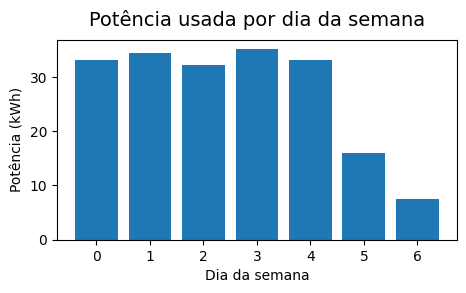

In [47]:
fig = plt.figure(figsize = (4,2))
eixo = fig.add_axes([0,0,1,1])
indice = range(len(uso_potencia_por_dia_da_semana))

eixo.bar(indice, uso_potencia_por_dia_da_semana)
eixo.set_title('Potência usada por dia da semana', fontsize = 14, pad = 10)
eixo.set_xlabel('Dia da semana', fontsize = 10)
eixo.set_ylabel('Potência (kWh)', fontsize = 10);

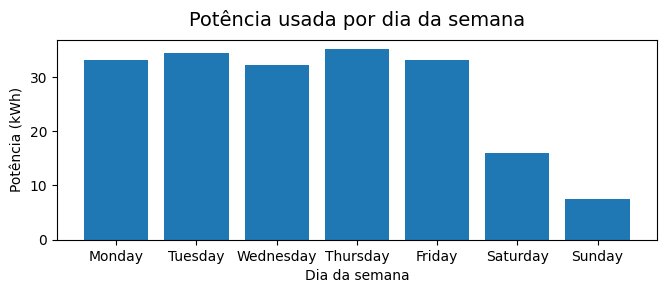

In [48]:
fig = plt.figure(figsize = (6,2))
eixo = fig.add_axes([0,0,1,1])
indice = range(len(uso_potencia_por_dia_da_semana))

eixo.bar(indice, uso_potencia_por_dia_da_semana)
eixo.set_title('Potência usada por dia da semana', fontsize = 14, pad = 10)
eixo.set_xlabel('Dia da semana', fontsize = 10)
eixo.set_ylabel('Potência (kWh)', fontsize = 10)
eixo.set_xticks(indice)
eixo.set_xticklabels(dias);

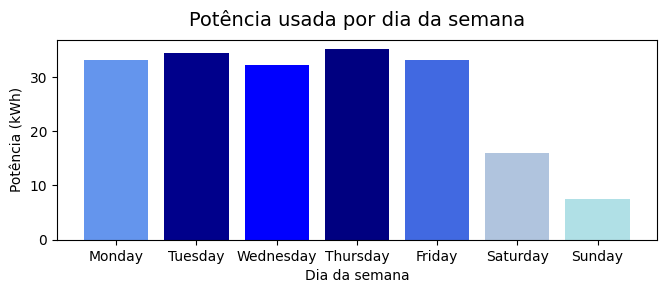

In [49]:
fig = plt.figure(figsize = (6,2))
eixo = fig.add_axes([0,0,1,1])
indice = range(len(uso_potencia_por_dia_da_semana))
cores = ['cornflowerblue', 'darkblue', 'b', 'navy', 'royalblue', 'lightsteelblue', 'powderblue']

eixo.bar(indice, uso_potencia_por_dia_da_semana, color = cores)
eixo.set_title('Potência usada por dia da semana', fontsize = 14, pad = 10)
eixo.set_xlabel('Dia da semana', fontsize = 10)
eixo.set_ylabel('Potência (kWh)', fontsize = 10)
eixo.set_xticks(indice)
eixo.set_xticklabels(dias);

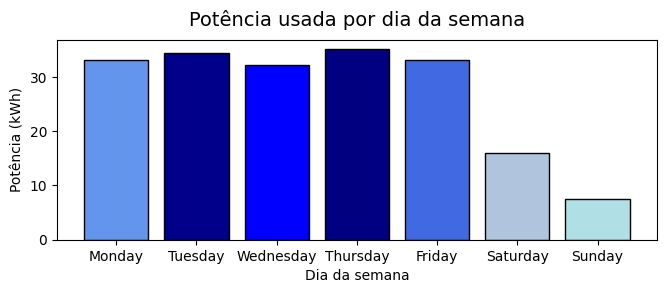

In [50]:
fig = plt.figure(figsize = (6,2))
eixo = fig.add_axes([0,0,1,1])
indice = range(len(uso_potencia_por_dia_da_semana))
cores = ['cornflowerblue', 'darkblue', 'b', 'navy', 'royalblue', 'lightsteelblue', 'powderblue']

eixo.bar(indice, uso_potencia_por_dia_da_semana, color = cores, edgecolor = 'black')
eixo.set_title('Potência usada por dia da semana', fontsize = 14, pad = 10)
eixo.set_xlabel('Dia da semana', fontsize = 10)
eixo.set_ylabel('Potência (kWh)', fontsize = 10)
eixo.set_xticks(indice)
eixo.set_xticklabels(dias);

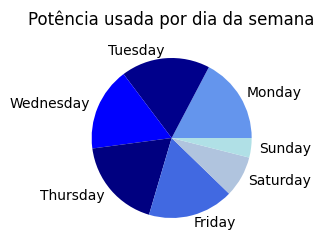

In [51]:
fig = plt.figure(figsize = (6,2))
eixo = fig.add_axes([0,0,1,1])

eixo.pie(uso_potencia_por_dia_da_semana, labels = uso_potencia_por_dia_da_semana.index, colors = cores)
eixo.set_title('Potência usada por dia da semana', size = 12, pad = 10);

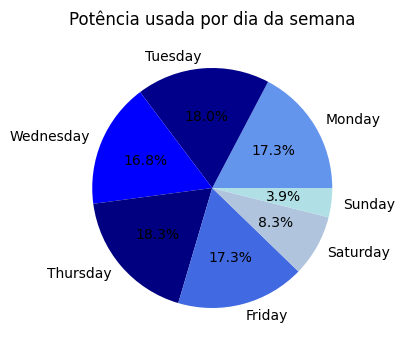

In [52]:
fig = plt.figure(figsize = (6,3))
eixo = fig.add_axes([0,0,1,1])

eixo.pie(uso_potencia_por_dia_da_semana, labels = uso_potencia_por_dia_da_semana.index, colors = cores, autopct='%.1f%%')
eixo.set_title('Potência usada por dia da semana', size = 12, pad = 10);

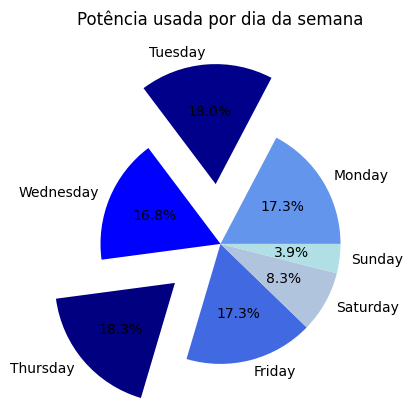

In [53]:
fig = plt.figure(figsize = (6,3))
eixo = fig.add_axes([0,0,1,1])
explodir = [0,0.5,0,0.5,0,0,0]

eixo.pie(uso_potencia_por_dia_da_semana, labels = uso_potencia_por_dia_da_semana.index, colors = cores, autopct='%.1f%%',
        explode = explodir)
eixo.set_title('Potência usada por dia da semana', size = 12, pad = 50);

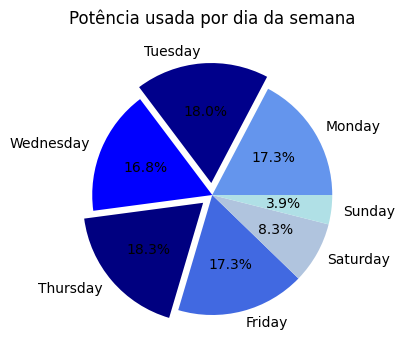

In [54]:
fig = plt.figure(figsize = (6,3))
eixo = fig.add_axes([0,0,1,1])
explodir = [0,0.1,0,0.1,0,0,0]

eixo.pie(uso_potencia_por_dia_da_semana, labels = uso_potencia_por_dia_da_semana.index, colors = cores, autopct='%.1f%%',
        explode = explodir)
eixo.set_title('Potência usada por dia da semana', size = 12, pad = 15);

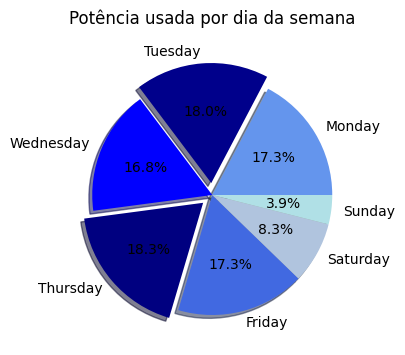

In [55]:
fig = plt.figure(figsize = (6,3))
eixo = fig.add_axes([0,0,1,1])
explodir = [0,0.1,0,0.1,0,0,0]

eixo.pie(uso_potencia_por_dia_da_semana, labels = uso_potencia_por_dia_da_semana.index, colors = cores, autopct='%.1f%%',
        explode = explodir, shadow = True)
eixo.set_title('Potência usada por dia da semana', size = 12, pad = 15);

# Visualizando dados diferentes:

In [56]:
empresa.head()

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
95  01/01/2018 00:00       3.42                                  3.46   
0   01/01/2018 00:15       3.17                                  2.95   
1   01/01/2018 00:30       4.00                                  4.46   
2   01/01/2018 00:45       3.24                                  3.28   
3   01/01/2018 01:00       3.31                                  3.56   

    Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
95                                   0.0        0.0   
0                                    0.0        0.0   
1                                    0.0        0.0   
2                                    0.0        0.0   
3                                    0.0        0.0   

    Lagging_Current_Power_Factor  Leading_Current_Power_Factor   NSM  \
95                         70.30                         100.0     0   
0                          73.21                         100.0   900   
1                          66.77                         100.0  1800   
2                          70.28                         100.0  2700   
3                          68.09                         100.0  3600   

   WeekStatus Day_of_week   Load_Type  
95    Weekday      Monday  Light_Load  
0     Weekday      Monday  Light_Load  
1     Weekday      Monday  Light_Load  
2     Weekday      Monday  Light_Load  
3     Weekday      Monday  Light_Load

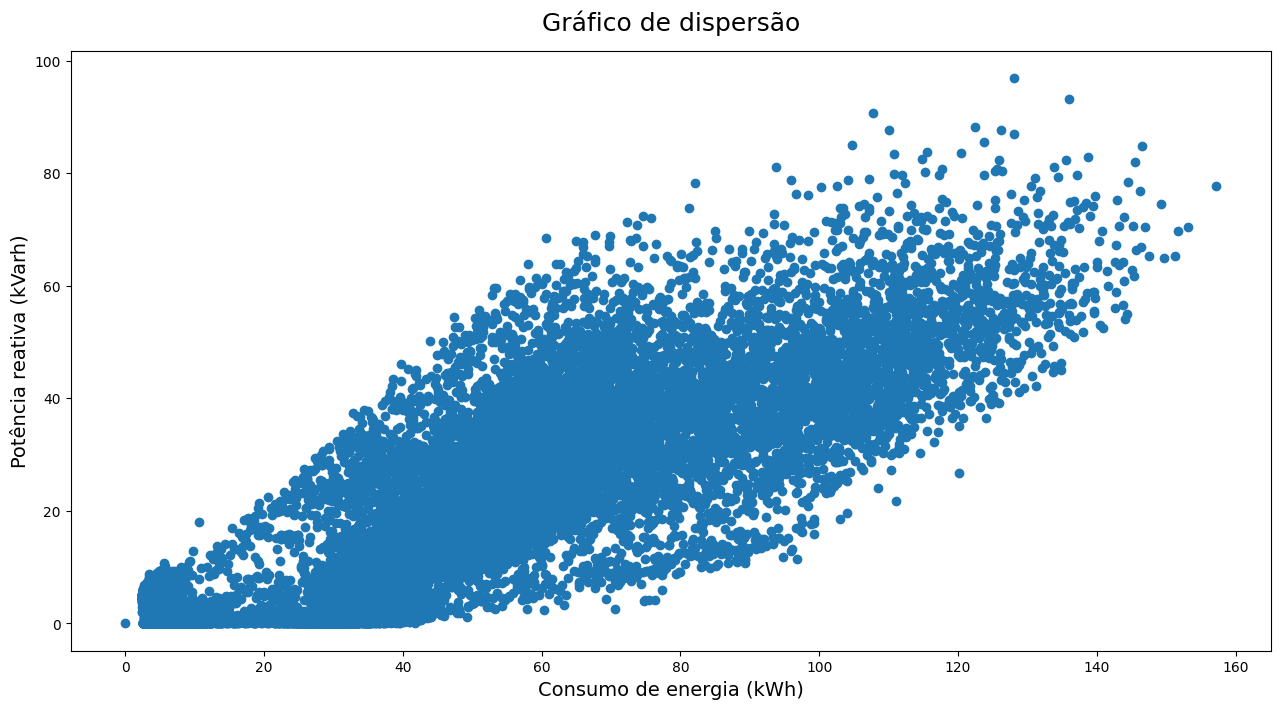

In [57]:
fig = plt.figure(figsize = (12,6))
eixo = fig.add_axes([0,0,1,1])

eixo.scatter(empresa['Usage_kWh'], empresa['Lagging_Current_Reactive.Power_kVarh'])
eixo.set_title('Gráfico de dispersão', fontsize = 18, pad = 15)
eixo.set_xlabel('Consumo de energia (kWh)', fontsize = 14)
eixo.set_ylabel('Potência reativa (kVarh)', fontsize = 14);

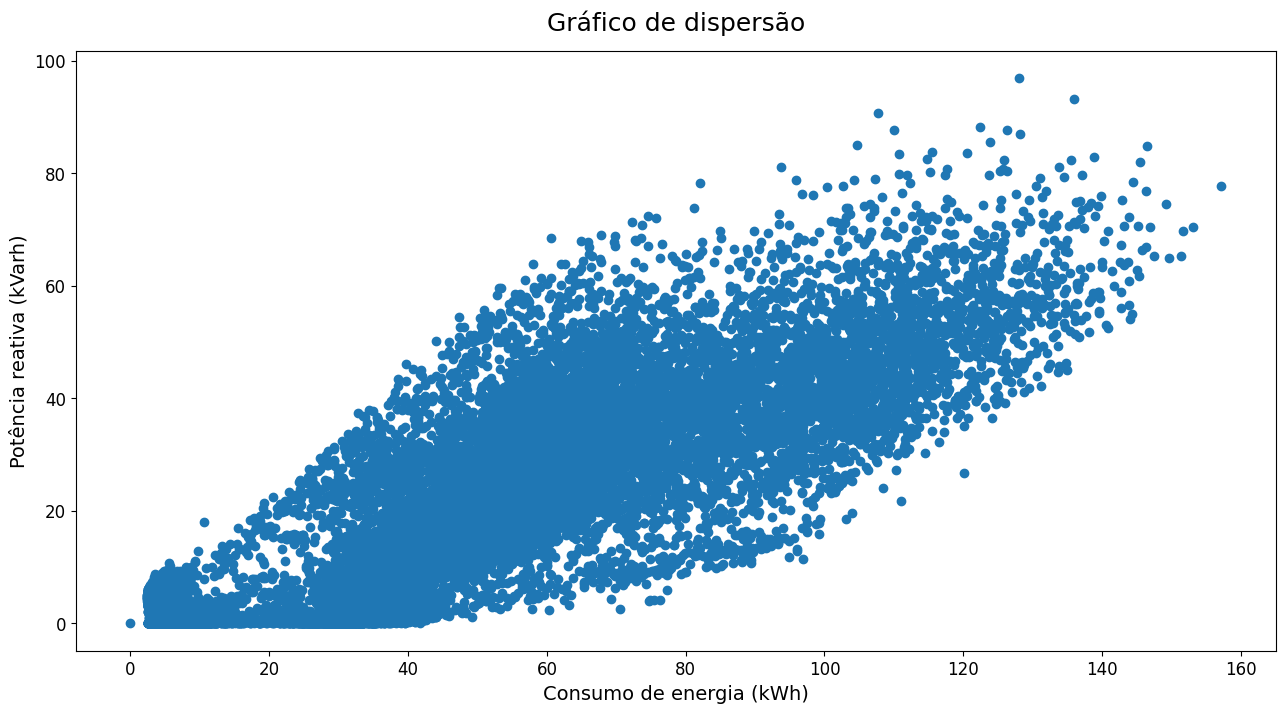

In [58]:
fig = plt.figure(figsize = (12,6))
eixo = fig.add_axes([0,0,1,1])

eixo.scatter(empresa['Usage_kWh'], empresa['Lagging_Current_Reactive.Power_kVarh'])
eixo.set_title('Gráfico de dispersão', fontsize = 18, pad = 15)
eixo.set_xlabel('Consumo de energia (kWh)', fontsize = 14)
eixo.set_ylabel('Potência reativa (kVarh)', fontsize = 14)
eixo.tick_params(labelsize = 12);

In [59]:
empresa.Load_Type.unique()

array(['Light_Load', 'Medium_Load', 'Maximum_Load'], dtype=object)

In [60]:
empresa.Load_Type.value_counts()

Load_Type
Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: count, dtype: int64

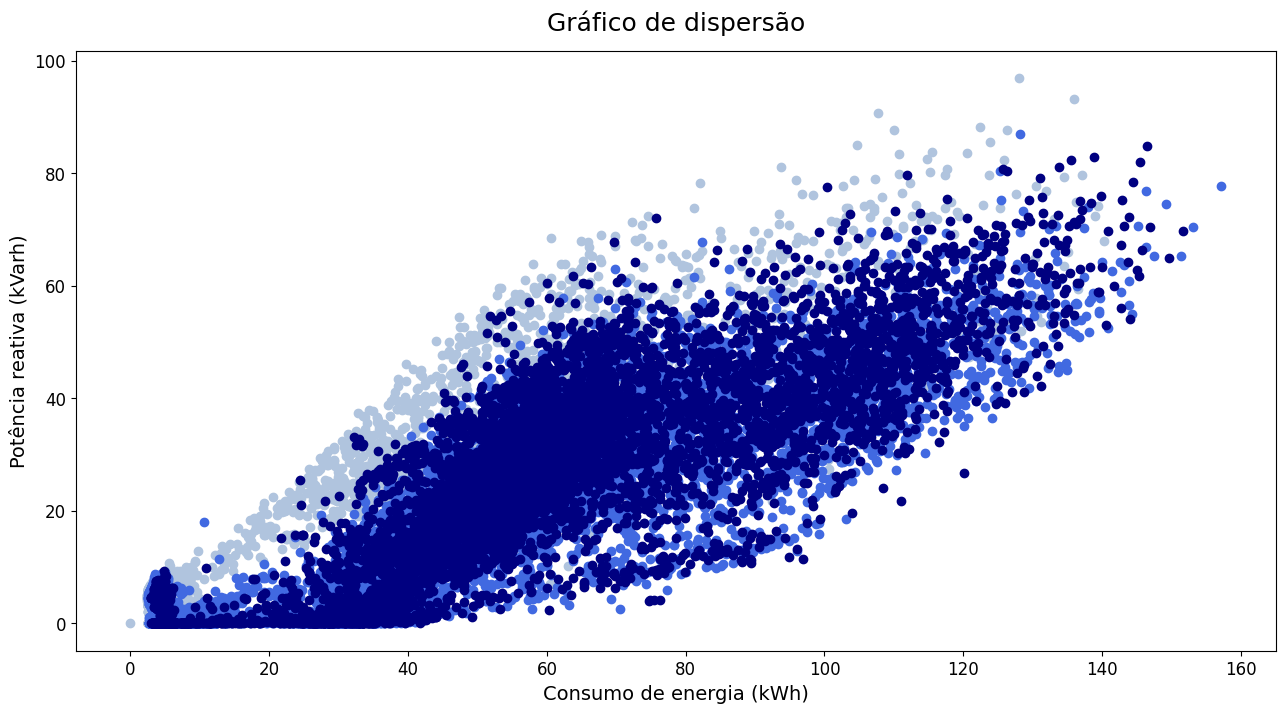

In [61]:
fig = plt.figure(figsize = (12,6))
eixo = fig.add_axes([0,0,1,1])

cores = {'Light_Load': 'lightsteelblue', 'Medium_Load': 'royalblue', 'Maximum_Load': 'navy'}

for carga in empresa['Load_Type'].unique():
    tmp = empresa[empresa['Load_Type'] == carga]
    eixo.scatter(tmp['Usage_kWh'], tmp['Lagging_Current_Reactive.Power_kVarh'], color = cores[carga])

#eixo.scatter(empresa['Usage_kWh'], empresa['Lagging_Current_Reactive.Power_kVarh'])
eixo.set_title('Gráfico de dispersão', fontsize = 18, pad = 15)
eixo.set_xlabel('Consumo de energia (kWh)', fontsize = 14)
eixo.set_ylabel('Potência reativa (kVarh)', fontsize = 14)
eixo.tick_params(labelsize = 12);

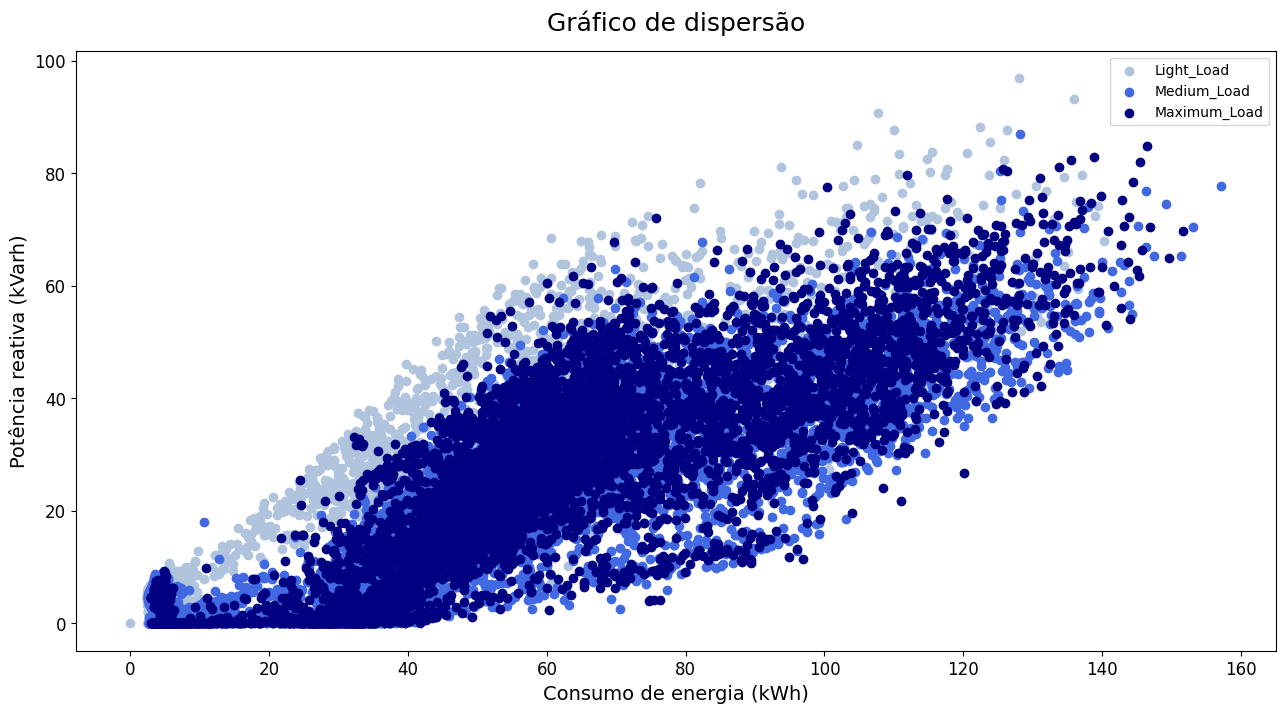

In [62]:
fig = plt.figure(figsize = (12,6))
eixo = fig.add_axes([0,0,1,1])

cores = {'Light_Load': 'lightsteelblue', 'Medium_Load': 'royalblue', 'Maximum_Load': 'navy'}

for carga in empresa['Load_Type'].unique():
    tmp = empresa[empresa['Load_Type'] == carga]
    eixo.scatter(tmp['Usage_kWh'], tmp['Lagging_Current_Reactive.Power_kVarh'], color = cores[carga])

eixo.set_title('Gráfico de dispersão', fontsize = 18, pad = 15)
eixo.set_xlabel('Consumo de energia (kWh)', fontsize = 14)
eixo.set_ylabel('Potência reativa (kVarh)', fontsize = 14)
eixo.tick_params(labelsize = 12)
eixo.legend(cores, fontsize = 10);

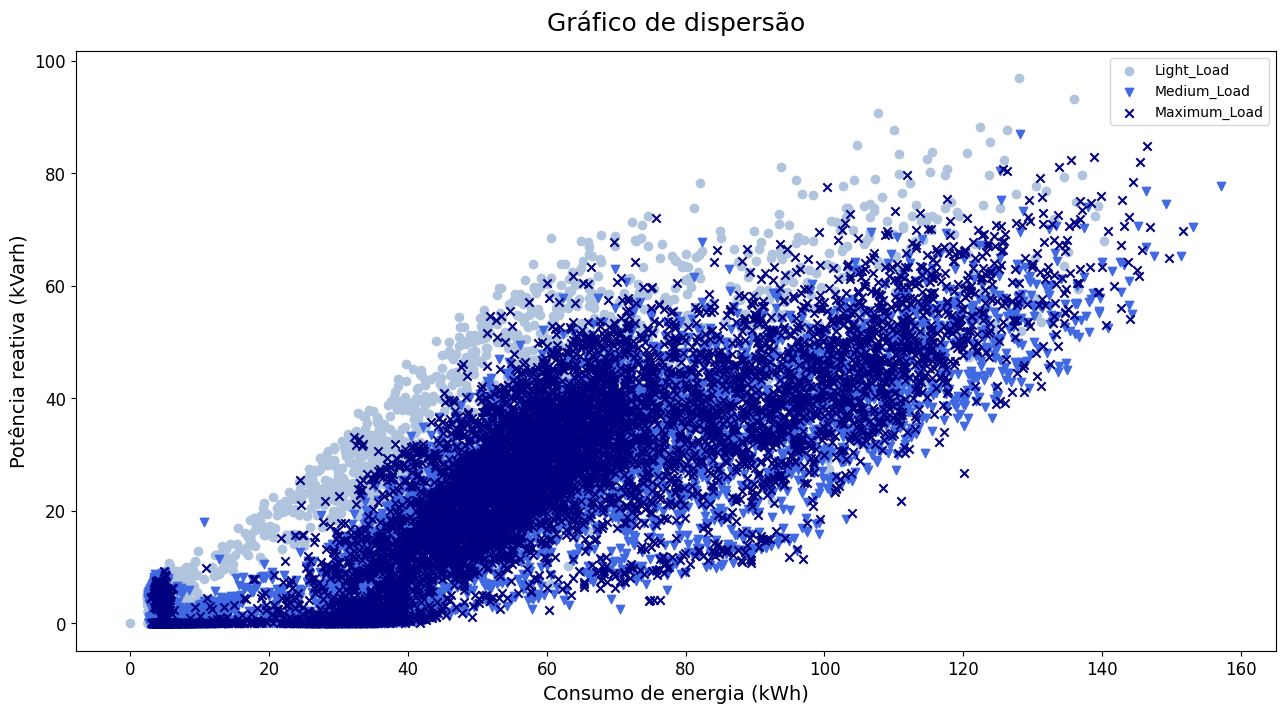

In [63]:
fig = plt.figure(figsize = (12,6))
eixo = fig.add_axes([0,0,1,1])

cores = {'Light_Load': 'lightsteelblue', 'Medium_Load': 'royalblue', 'Maximum_Load': 'navy'}
marcadores = {'Light_Load': 'o', 'Medium_Load': 'v', 'Maximum_Load': 'x'}

for carga in empresa['Load_Type'].unique():
    tmp = empresa[empresa['Load_Type'] == carga]
    eixo.scatter(tmp['Usage_kWh'], tmp['Lagging_Current_Reactive.Power_kVarh'], color = cores[carga], 
                 marker = marcadores[carga])

eixo.set_title('Gráfico de dispersão', fontsize = 18, pad = 15)
eixo.set_xlabel('Consumo de energia (kWh)', fontsize = 14)
eixo.set_ylabel('Potência reativa (kVarh)', fontsize = 14)
eixo.tick_params(labelsize = 12)
eixo.legend(cores, fontsize = 10);

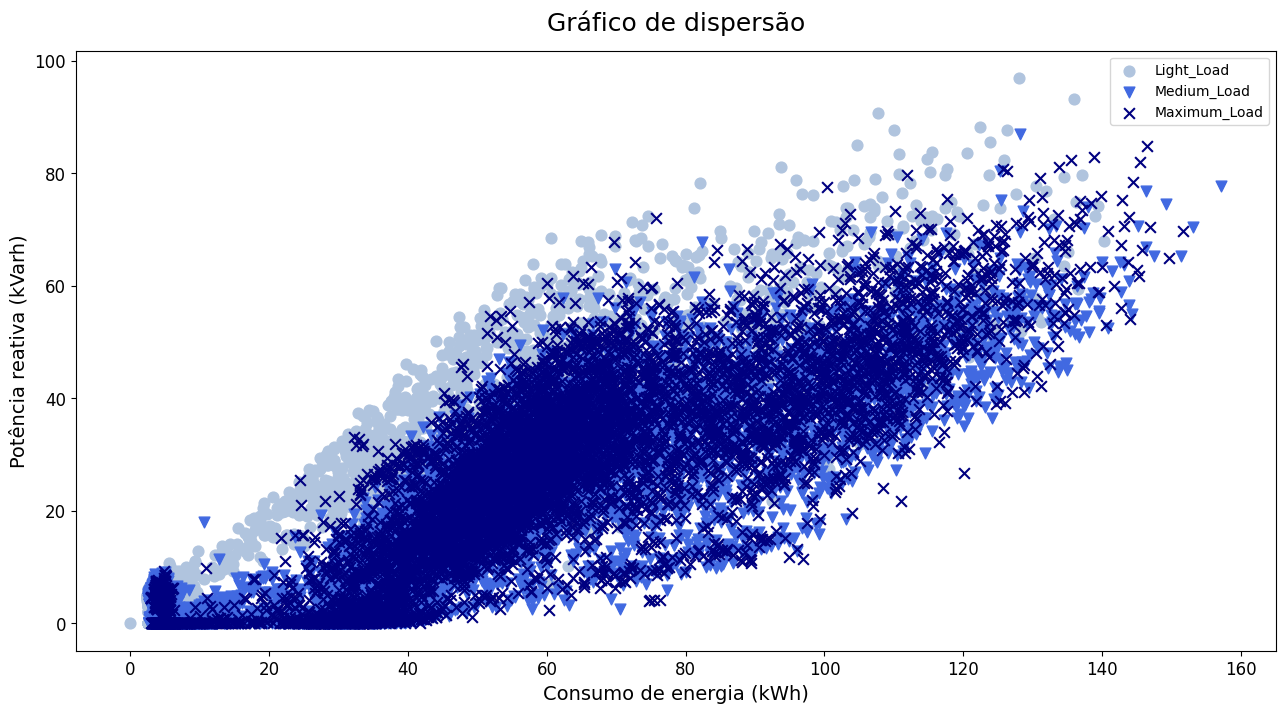

In [64]:
fig = plt.figure(figsize = (12,6))
eixo = fig.add_axes([0,0,1,1])

cores = {'Light_Load': 'lightsteelblue', 'Medium_Load': 'royalblue', 'Maximum_Load': 'navy'}
marcadores = {'Light_Load': 'o', 'Medium_Load': 'v', 'Maximum_Load': 'x'}

for carga in empresa['Load_Type'].unique():
    tmp = empresa[empresa['Load_Type'] == carga]
    eixo.scatter(tmp['Usage_kWh'], tmp['Lagging_Current_Reactive.Power_kVarh'], color = cores[carga], 
                 marker = marcadores[carga], s = 60)

eixo.set_title('Gráfico de dispersão', fontsize = 18, pad = 15)
eixo.set_xlabel('Consumo de energia (kWh)', fontsize = 14)
eixo.set_ylabel('Potência reativa (kVarh)', fontsize = 14)
eixo.tick_params(labelsize = 12)
eixo.legend(cores, fontsize = 10);

## Boxplot:

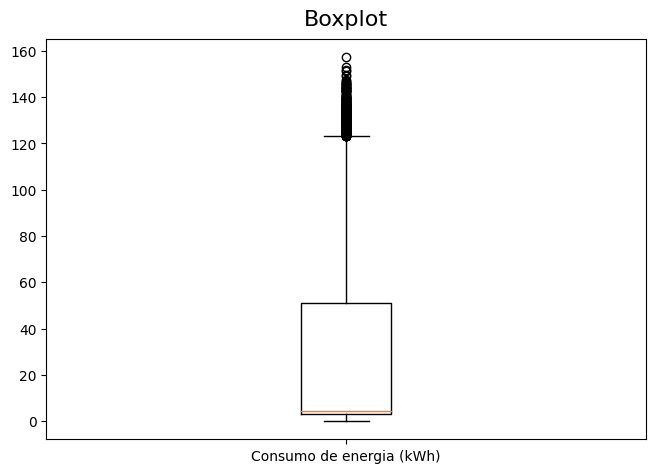

In [65]:
fig = plt.figure(figsize = (6,4))
eixo = fig.add_axes([0,0,1,1])

eixo.boxplot(empresa['Usage_kWh'])
eixo.set_title('Boxplot', fontsize = 16, pad = 10)
eixo.set_xticklabels(['Consumo de energia (kWh)']);

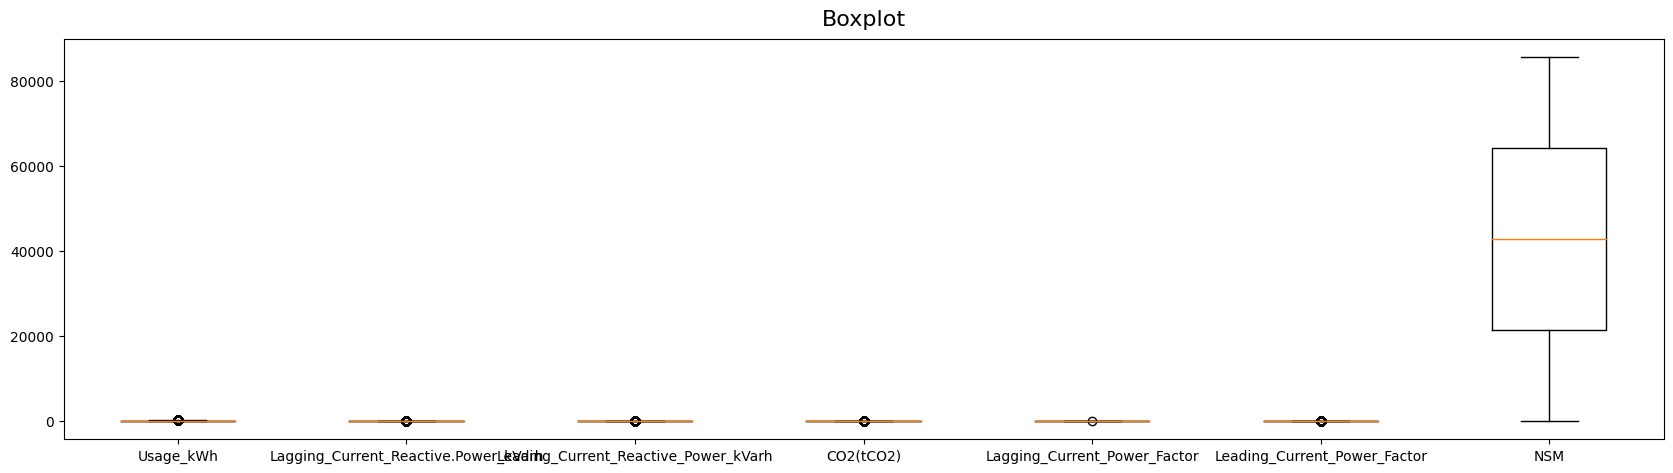

In [66]:
fig = plt.figure(figsize = (16,4))
eixo = fig.add_axes([0,0,1,1])

eixo.boxplot(empresa.drop(['date','Load_Type','WeekStatus','Day_of_week'], axis = 1))
eixo.set_title('Boxplot', fontsize = 16, pad = 10)
eixo.set_xticklabels(empresa.drop(['date','Load_Type','WeekStatus','Day_of_week'], axis = 1).columns);

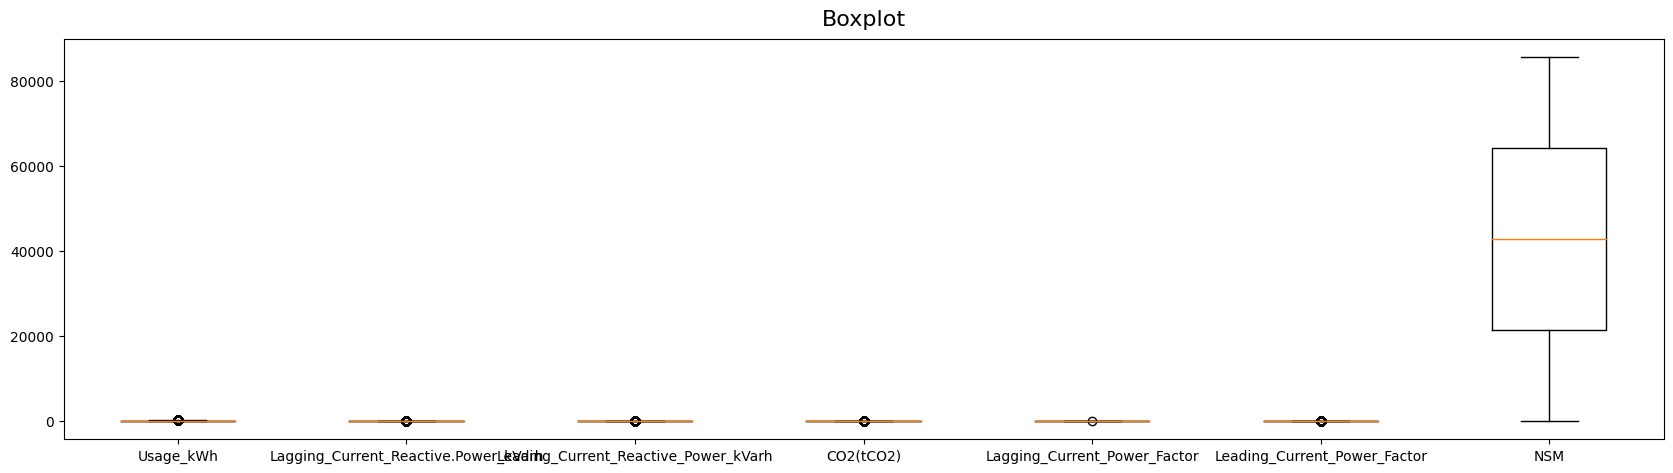

In [67]:
fig = plt.figure(figsize = (16,4))
eixo = fig.add_axes([0,0,1,1])

eixo.boxplot(empresa.drop(['date','Load_Type','WeekStatus','Day_of_week'], axis = 1).values)
eixo.set_title('Boxplot', fontsize = 16, pad = 10)
eixo.set_xticklabels(empresa.drop(['date','Load_Type','WeekStatus','Day_of_week'], axis = 1).columns);

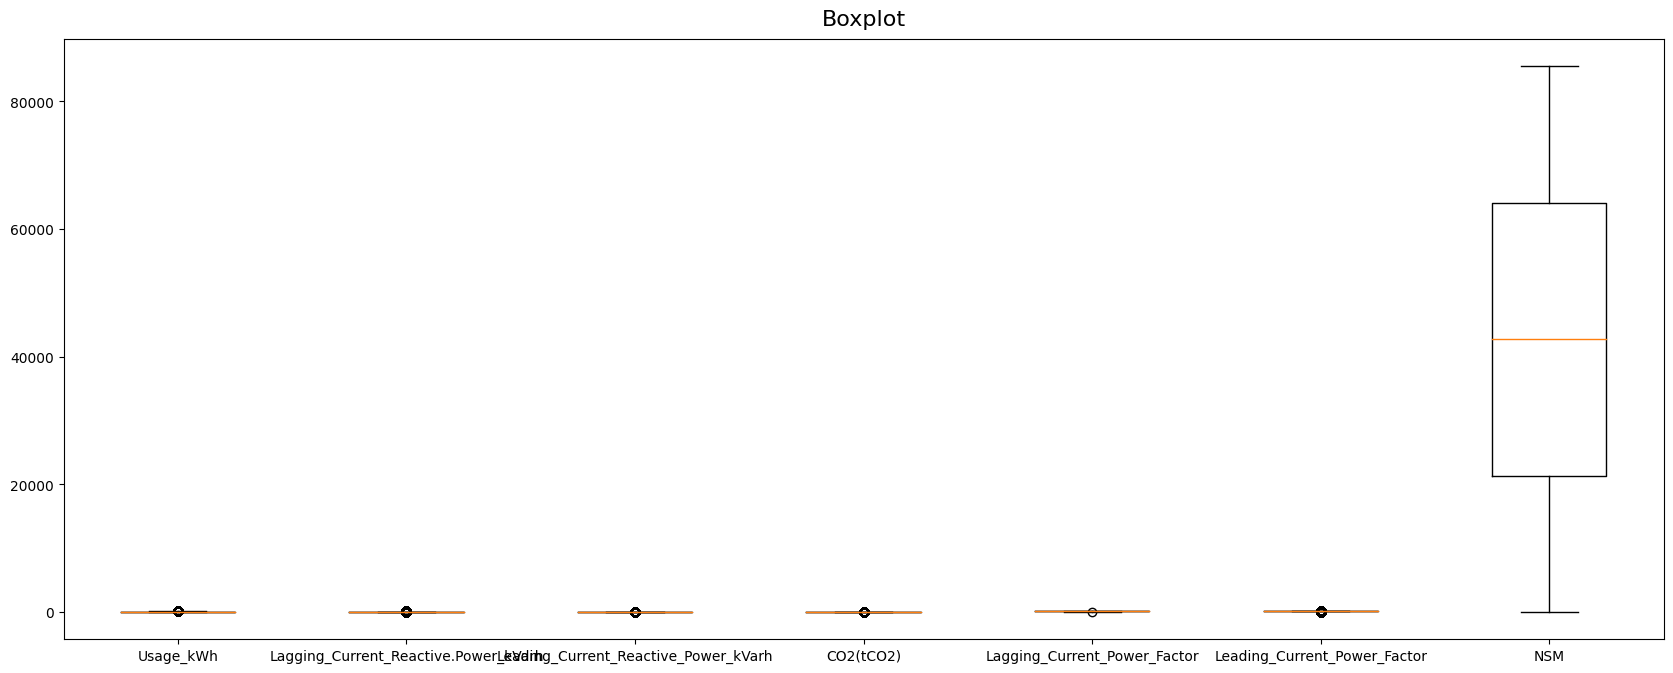

In [68]:
fig = plt.figure(figsize = (16,6))
eixo = fig.add_axes([0,0,1,1])

eixo.boxplot(empresa.drop(['date','Load_Type','WeekStatus','Day_of_week'], axis = 1).values)
eixo.set_title('Boxplot', fontsize = 16, pad = 10)
eixo.set_xticklabels(empresa.drop(['date','Load_Type','WeekStatus','Day_of_week'], axis = 1).columns);

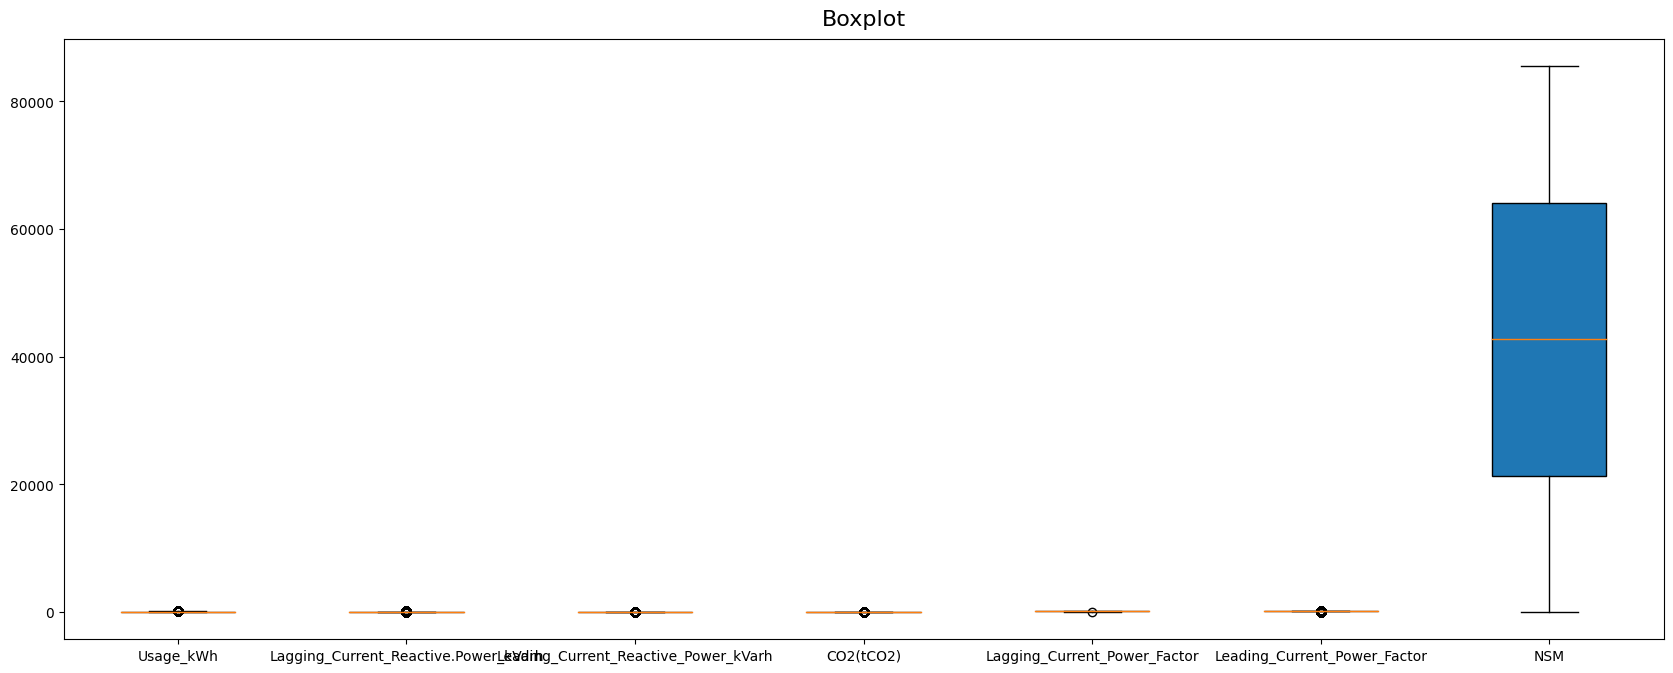

In [69]:
fig = plt.figure(figsize = (16,6))
eixo = fig.add_axes([0,0,1,1])

eixo.boxplot(empresa.drop(['date','Load_Type','WeekStatus','Day_of_week'], axis = 1).values, patch_artist = True)
eixo.set_title('Boxplot', fontsize = 16, pad = 10)
eixo.set_xticklabels(empresa.drop(['date','Load_Type','WeekStatus','Day_of_week'], axis = 1).columns);

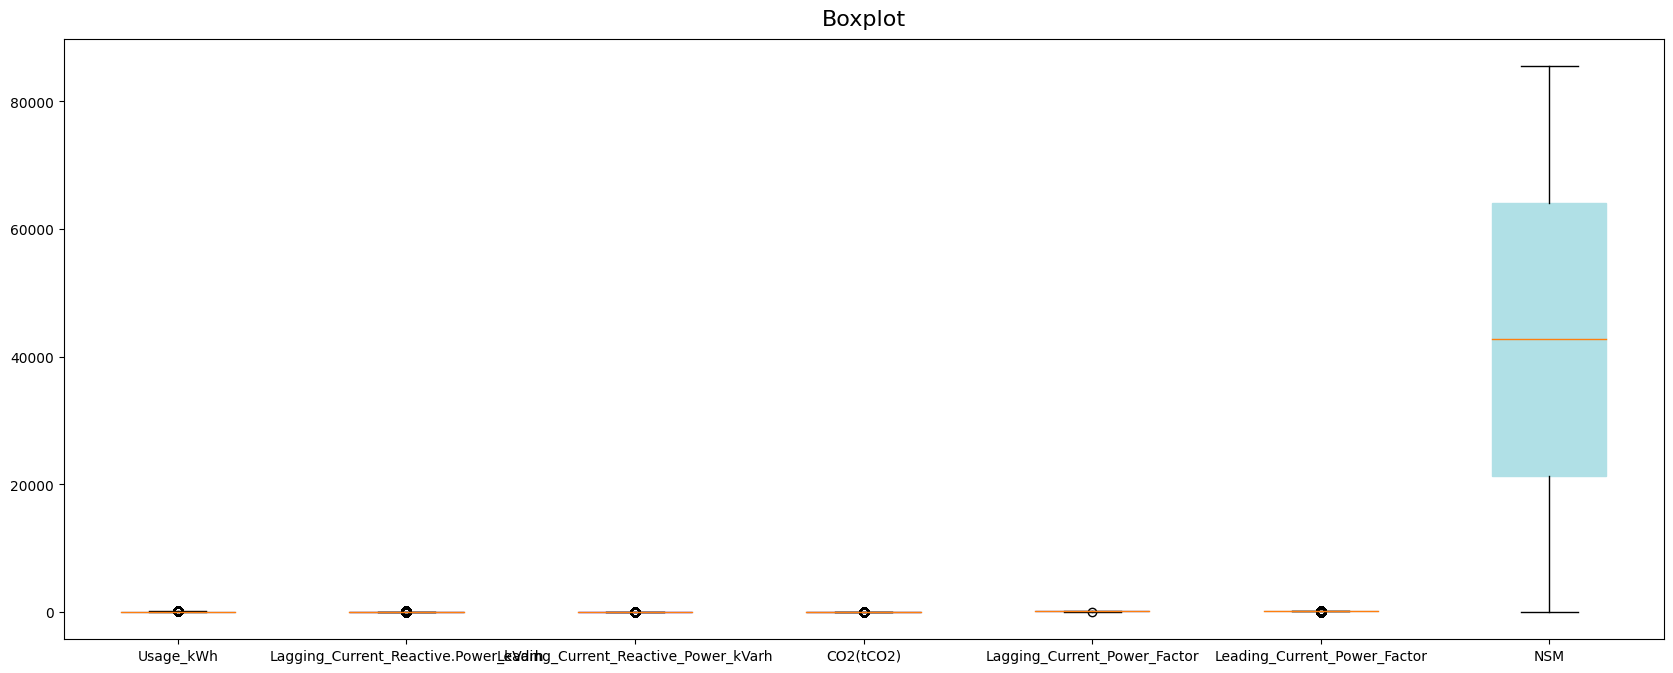

In [70]:
fig = plt.figure(figsize = (16,6))
eixo = fig.add_axes([0,0,1,1])

cores = ['cornflowerblue', 'darkblue', 'b', 'navy', 'royalblue', 'lightsteelblue', 'powderblue']

boxes = eixo.boxplot(empresa.drop(['date','Load_Type','WeekStatus','Day_of_week'], axis = 1).values, patch_artist = True)
eixo.set_title('Boxplot', fontsize = 16, pad = 10)
eixo.set_xticklabels(empresa.drop(['date','Load_Type','WeekStatus','Day_of_week'], axis = 1).columns)

for box, cor in zip(boxes['boxes'], cores):
    box.set(color = cor);

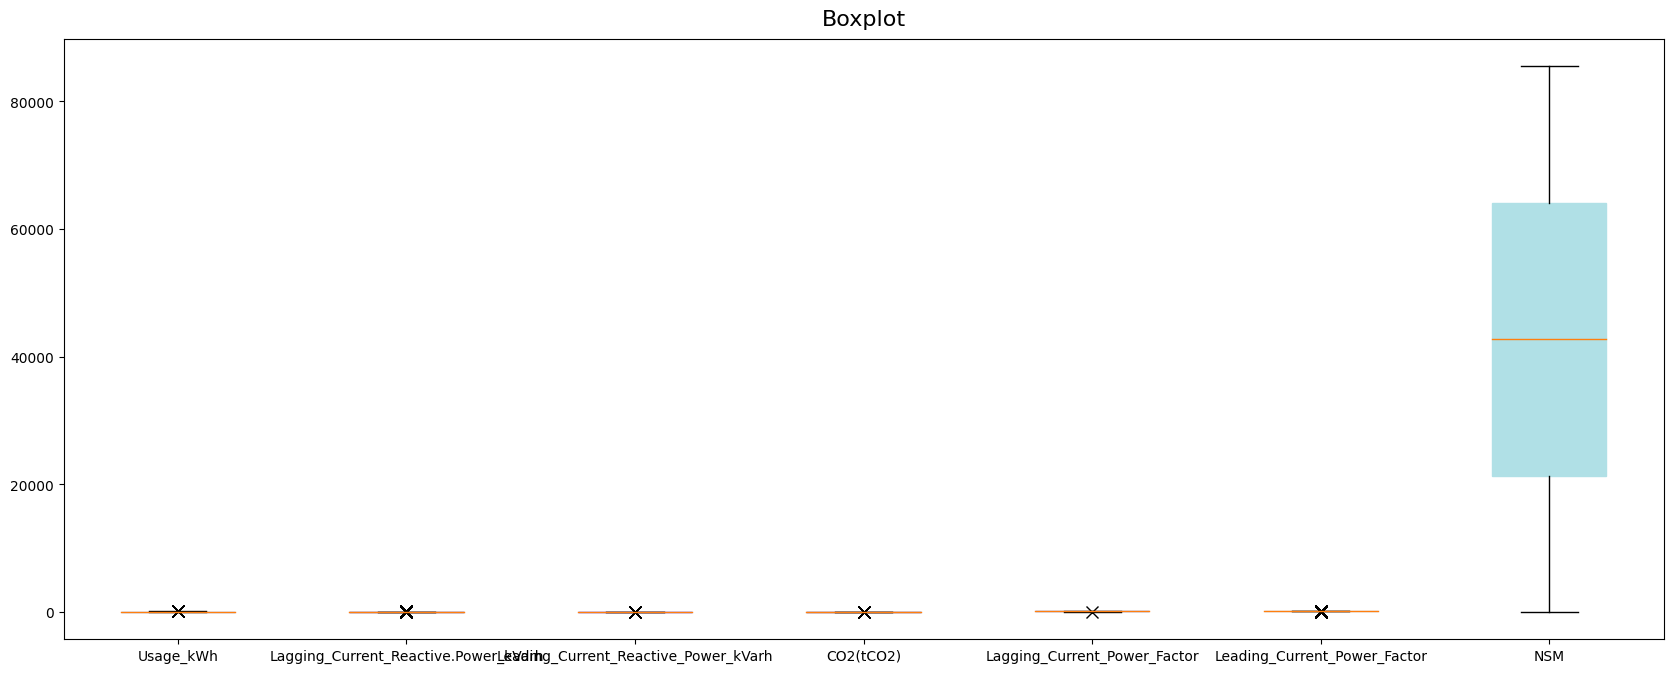

In [71]:
fig = plt.figure(figsize = (16,6))
eixo = fig.add_axes([0,0,1,1])

cores = ['cornflowerblue', 'darkblue', 'b', 'navy', 'royalblue', 'lightsteelblue', 'powderblue']

boxes = eixo.boxplot(empresa.drop(['date','Load_Type','WeekStatus','Day_of_week'], axis = 1).values, patch_artist = True)
eixo.set_title('Boxplot', fontsize = 16, pad = 10)
eixo.set_xticklabels(empresa.drop(['date','Load_Type','WeekStatus','Day_of_week'], axis = 1).columns)

for box, cor in zip(boxes['boxes'], cores):
    box.set(color = cor)
    
for outlier in boxes['fliers']:
    outlier.set(marker = 'x', markersize = 8);

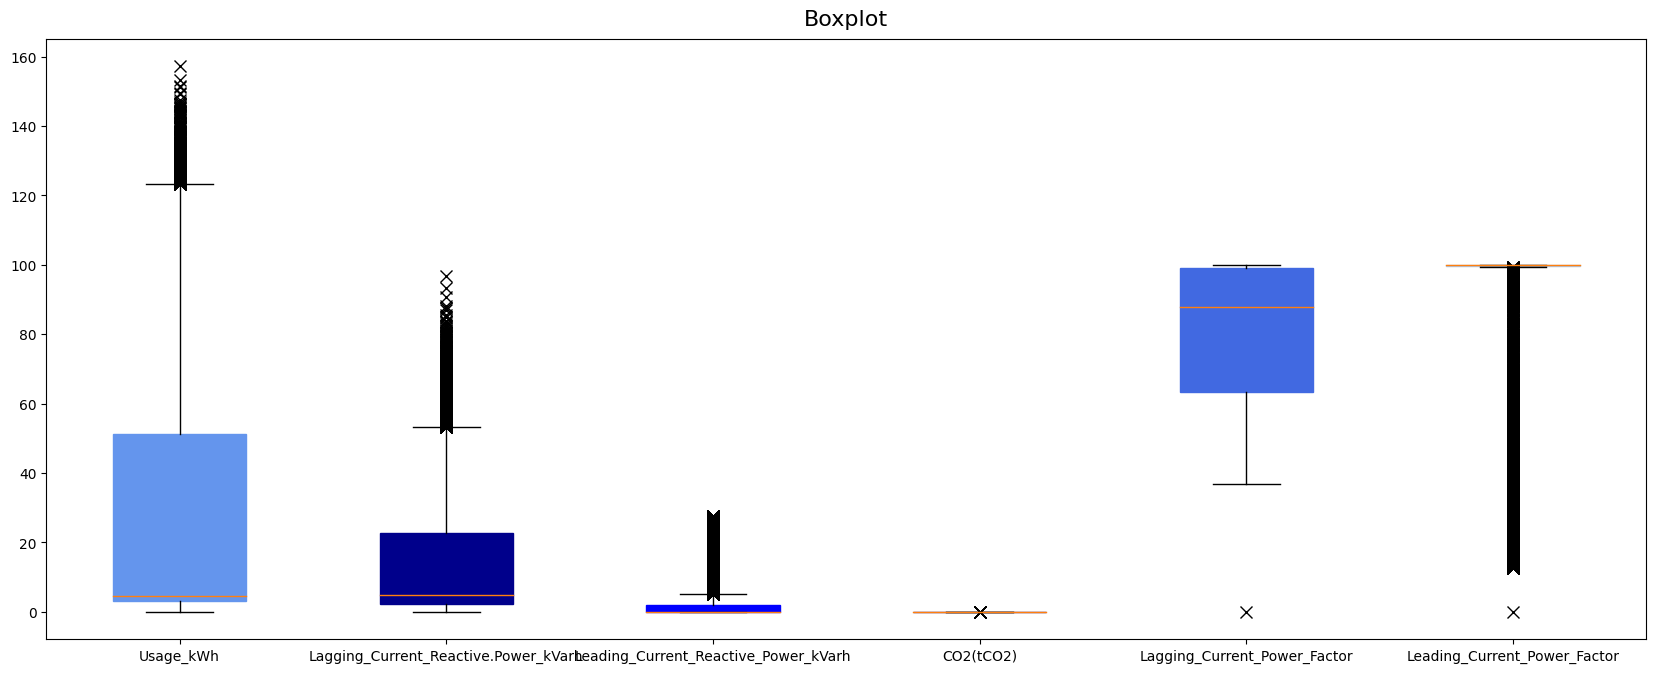

In [72]:
fig = plt.figure(figsize = (16,6))
eixo = fig.add_axes([0,0,1,1])

cores = ['cornflowerblue', 'darkblue', 'b', 'navy', 'royalblue', 'lightsteelblue']

boxes = eixo.boxplot(empresa.drop(['date','Load_Type','WeekStatus','Day_of_week', 'NSM'], axis = 1).values, 
                     patch_artist = True)
eixo.set_title('Boxplot', fontsize = 16, pad = 10)
eixo.set_xticklabels(empresa.drop(['date','Load_Type','WeekStatus','Day_of_week', 'NSM'], axis = 1).columns)

for box, cor in zip(boxes['boxes'], cores):
    box.set(color = cor)
    
for outlier in boxes['fliers']:
    outlier.set(marker = 'x', markersize = 8);

# Customizando histogramas:

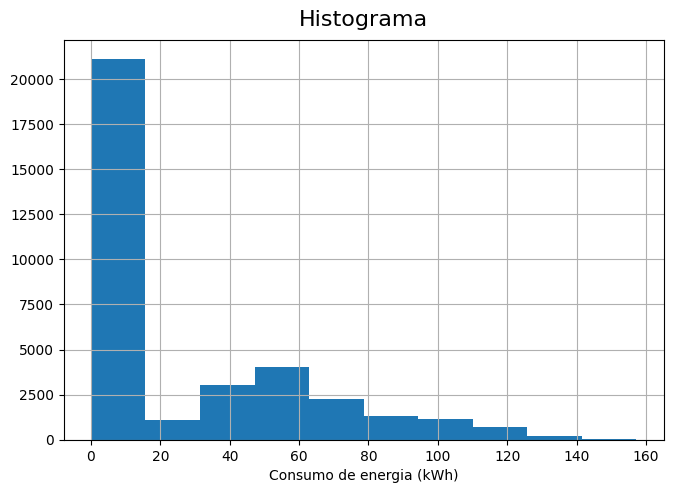

In [73]:
fig = plt.figure(figsize = (6,4))
eixo = fig.add_axes([0,0,1,1])

eixo.hist(empresa['Usage_kWh'])
eixo.set_title('Histograma', fontsize = 16, pad = 10)
eixo.set_xlabel('Consumo de energia (kWh)', fontsize = 10)
eixo.grid(True);

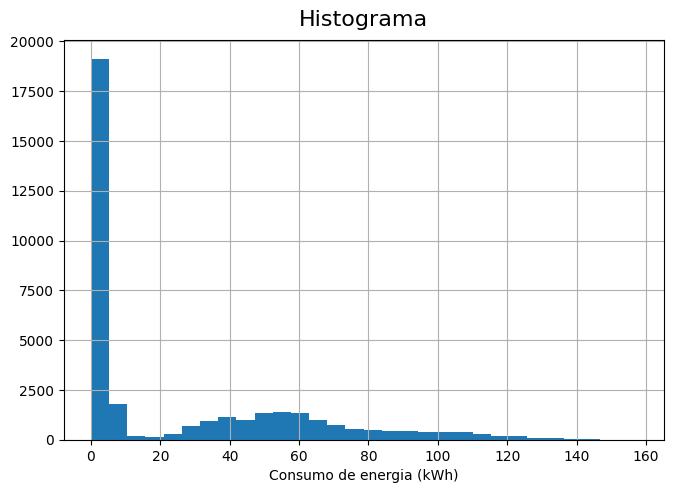

In [74]:
fig = plt.figure(figsize = (6,4))
eixo = fig.add_axes([0,0,1,1])

eixo.hist(empresa['Usage_kWh'], bins = 30)
eixo.set_title('Histograma', fontsize = 16, pad = 10)
eixo.set_xlabel('Consumo de energia (kWh)', fontsize = 10)
eixo.grid(True);

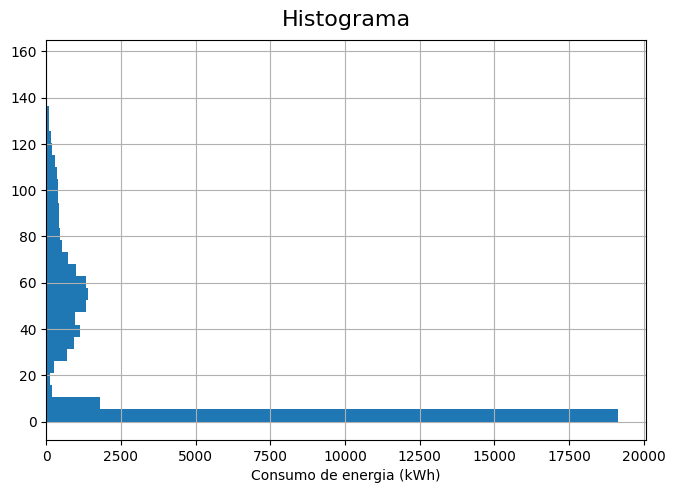

In [75]:
fig = plt.figure(figsize = (6,4))
eixo = fig.add_axes([0,0,1,1])

eixo.hist(empresa['Usage_kWh'], bins = 30, orientation = 'horizontal')
eixo.set_title('Histograma', fontsize = 16, pad = 10)
eixo.set_xlabel('Consumo de energia (kWh)', fontsize = 10)
eixo.grid(True);

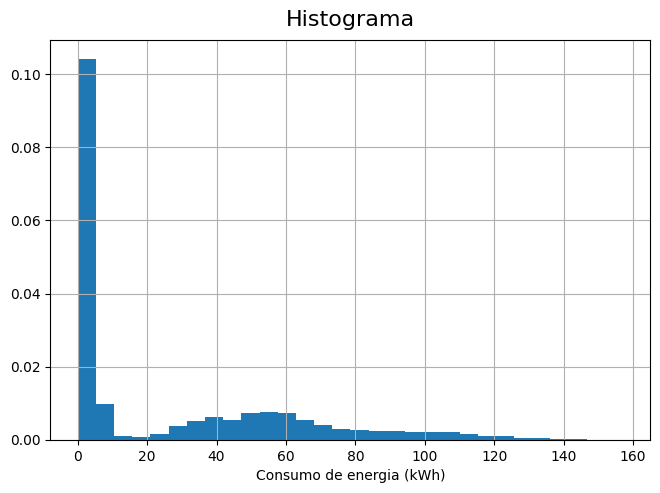

In [76]:
fig = plt.figure(figsize = (6,4))
eixo = fig.add_axes([0,0,1,1])

eixo.hist(empresa['Usage_kWh'], bins = 30, density = True)
eixo.set_title('Histograma', fontsize = 16, pad = 10)
eixo.set_xlabel('Consumo de energia (kWh)', fontsize = 10)
eixo.grid(True);

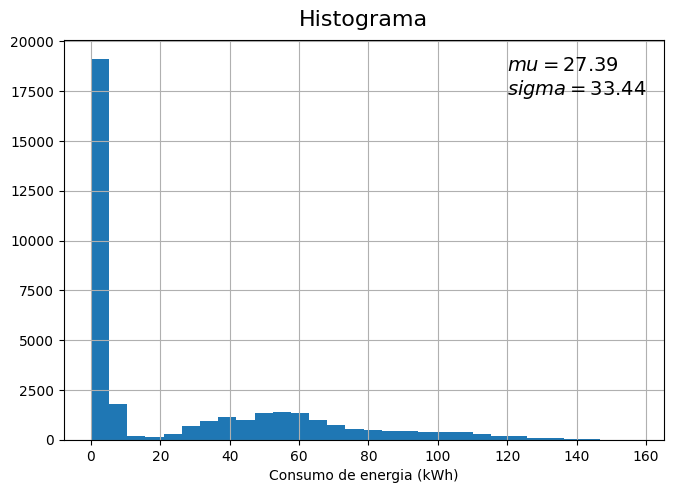

In [77]:
fig = plt.figure(figsize = (6,4))
eixo = fig.add_axes([0,0,1,1])

mu, sigma = empresa['Usage_kWh'].mean(), empresa['Usage_kWh'].std()

eixo.hist(empresa['Usage_kWh'], bins = 30)
eixo.set_title('Histograma', fontsize = 16, pad = 10)
eixo.set_xlabel('Consumo de energia (kWh)', fontsize = 10)
eixo.grid(True)

eixo.annotate('$mu = {0:.2f}$\n$sigma = {1:.2f}$'.format(mu, sigma), xy = (120, 17300), fontsize = 14);

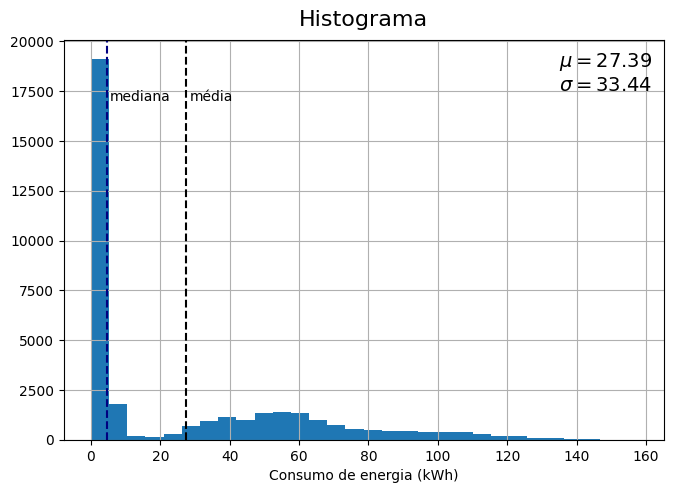

In [78]:
fig = plt.figure(figsize = (6,4))
eixo = fig.add_axes([0,0,1,1])

mu, sigma = empresa['Usage_kWh'].mean(), empresa['Usage_kWh'].std()

eixo.hist(empresa['Usage_kWh'], bins = 30)
eixo.set_title('Histograma', fontsize = 16, pad = 10)
eixo.set_xlabel('Consumo de energia (kWh)', fontsize = 10)
eixo.grid(True)

eixo.annotate('$\mu = {0:.2f}$\n$\sigma = {1:.2f}$'.format(mu, sigma), xy = (135, 17500), fontsize = 14)

eixo.axvline(mu, color = 'k', linestyle = '--')
eixo.annotate('média', xy = (mu + 1, 17000), fontsize = 10)

eixo.axvline(empresa['Usage_kWh'].median(), color = 'navy', linestyle = '--')
eixo.annotate('mediana', xy = (empresa['Usage_kWh'].median() + 1, 17000), fontsize = 10);

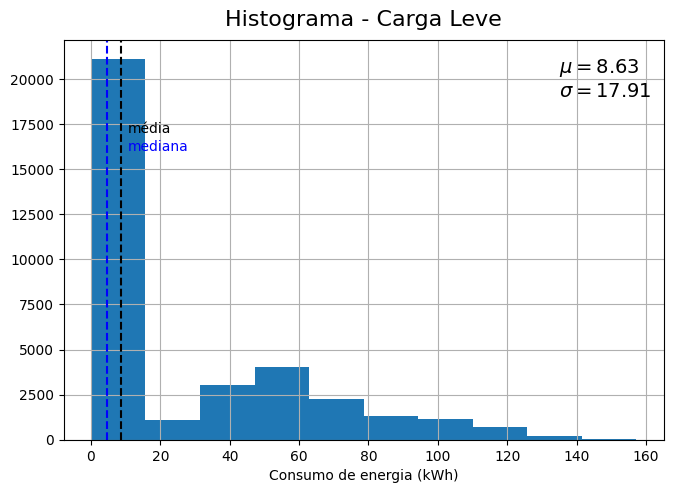

In [79]:
fig = plt.figure(figsize = (6,4))
eixo = fig.add_axes([0,0,1,1])

empresa_carga = empresa[empresa['Load_Type'] == 'Light_Load']

mu, sigma = empresa_carga['Usage_kWh'].mean(), empresa_carga['Usage_kWh'].std()

eixo.hist(empresa['Usage_kWh'], bins = 10)
eixo.set_title('Histograma - Carga Leve', fontsize = 16, pad = 10)
eixo.set_xlabel('Consumo de energia (kWh)', fontsize = 10)
eixo.grid(True)

eixo.annotate('$\mu = {0:.2f}$\n$\sigma = {1:.2f}$'.format(mu, sigma), xy = (135, 19000), fontsize = 14)

eixo.axvline(mu, color = 'k', linestyle = '--')
eixo.annotate('média', xy = (mu + 2, 17000), fontsize = 10)

eixo.axvline(empresa['Usage_kWh'].median(), color = 'b', linestyle = '--')
eixo.annotate('mediana', xy = (empresa['Usage_kWh'].median() + 6, 16000), fontsize = 10, color = 'b')

fig.savefig('histograma_carga.png', bbox_inches = 'tight');